In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/marketing_campaign.csv')
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Calculate percentage of missing values in each column.
for i in df.isna().sum():
    print((i/len(df))*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
1.0714285714285714 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %


In [ ]:
# Drop rows where 'Income' column has missing values
df = df.dropna(subset=['Income'])
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2216 rows x 29 columns]

In [ ]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

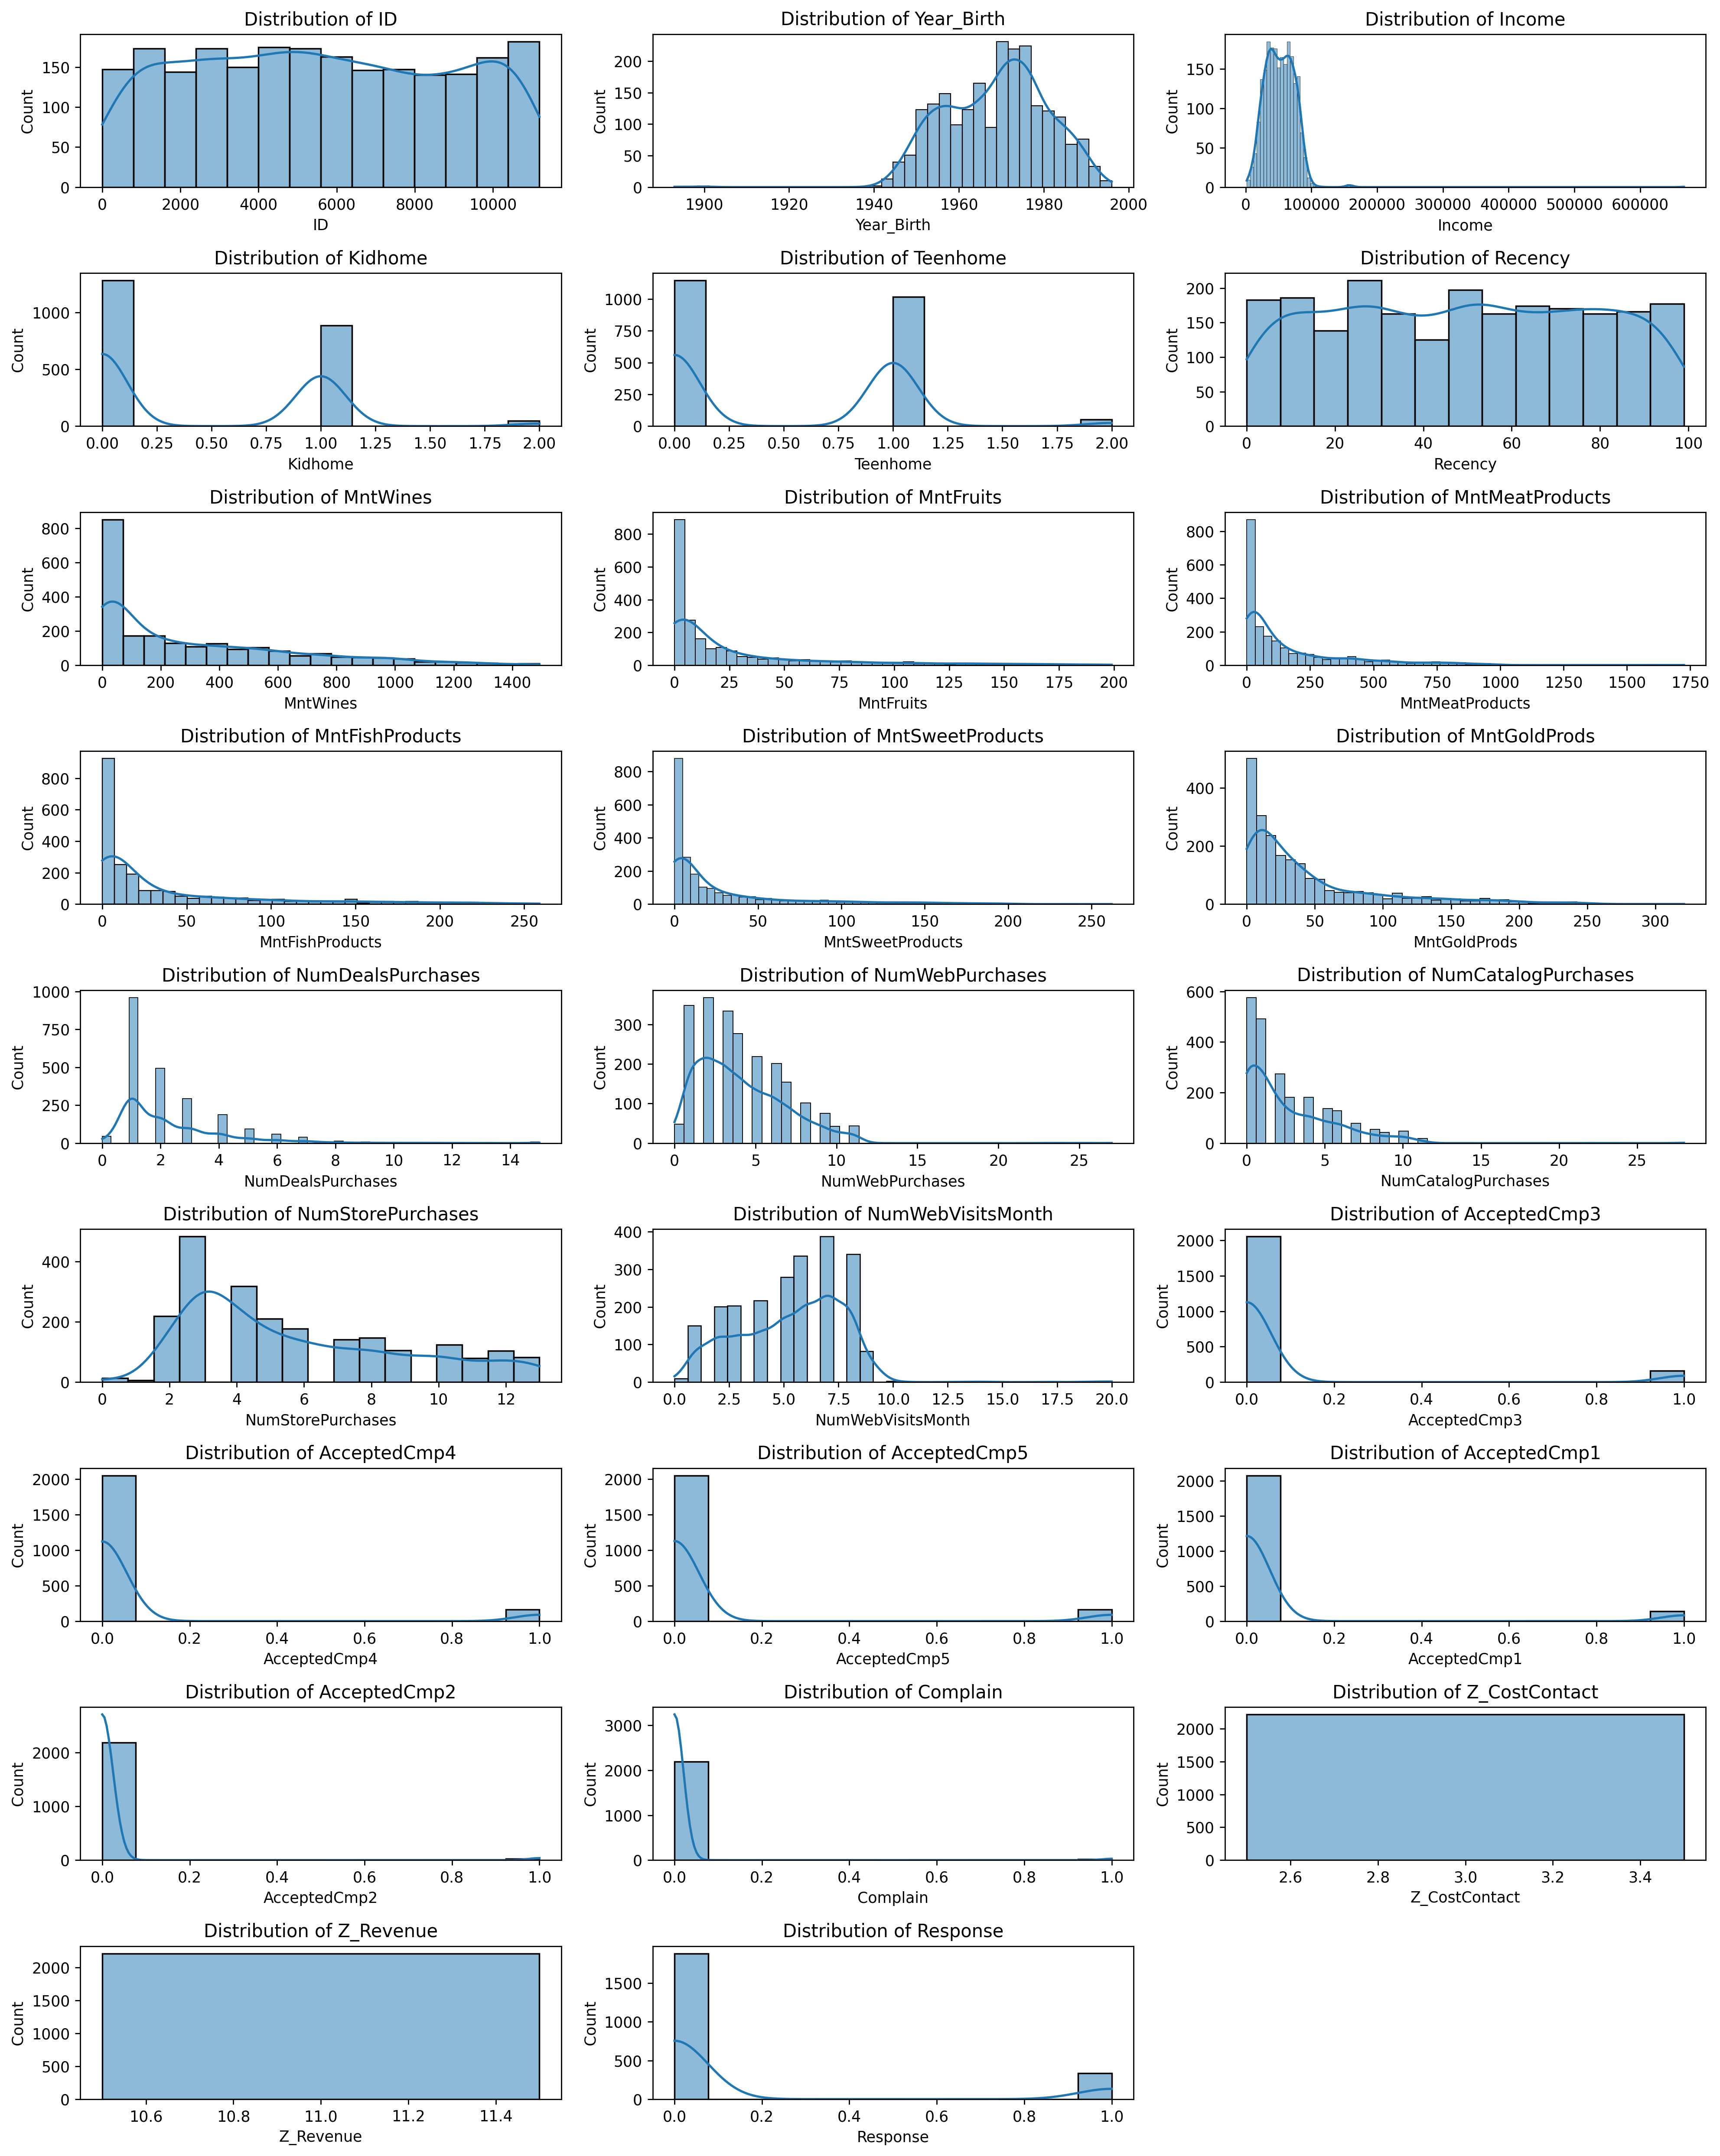

In [ ]:
numerical_columns =df.select_dtypes(include=['int64', 'float64']).columns
num_rows = (len(numerical_columns) + 3 - 1) //3
plt.figure(figsize=(16, 20))
for i, column in enumerate(numerical_columns,1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'ID'),
  Text(2, 0, 'Year_Birth'),
  Text(3, 0, 'Income'),
  Text(4, 0, 'Kidhome'),
  Text(5, 0, 'Teenhome'),
  Text(6, 0, 'Recency'),
  Text(7, 0, 'MntWines'),
  Text(8, 0, 'MntFruits'),
  Text(9, 0, 'MntMeatProducts'),
  Text(10, 0, 'MntFishProducts'),
  Text(11, 0, 'MntSweetProducts'),
  Text(12, 0, 'MntGoldProds'),
  Text(13, 0, 'NumDealsPurchases'),
  Text(14, 0, 'NumWebPurchases'),
  Text(15, 0, 'NumCatalogPurchases'),
  Text(16, 0, 'NumStorePurchases'),
  Text(17, 0, 'NumWebVisitsMonth'),
  Text(18, 0, 'AcceptedCmp3'),
  Text(19, 0, 'AcceptedCmp4'),
  Text(20, 0, 'AcceptedCmp5'),
  Text(21, 0, 'AcceptedCmp1'),
  Text(22, 0, 'AcceptedCmp2'),
  Text(23, 0, 'Complain'),
  Text(24, 0, 'Z_CostContact'),
  Text(25, 0, 'Z_Revenue'),
  Text(26, 0, 'Response')])

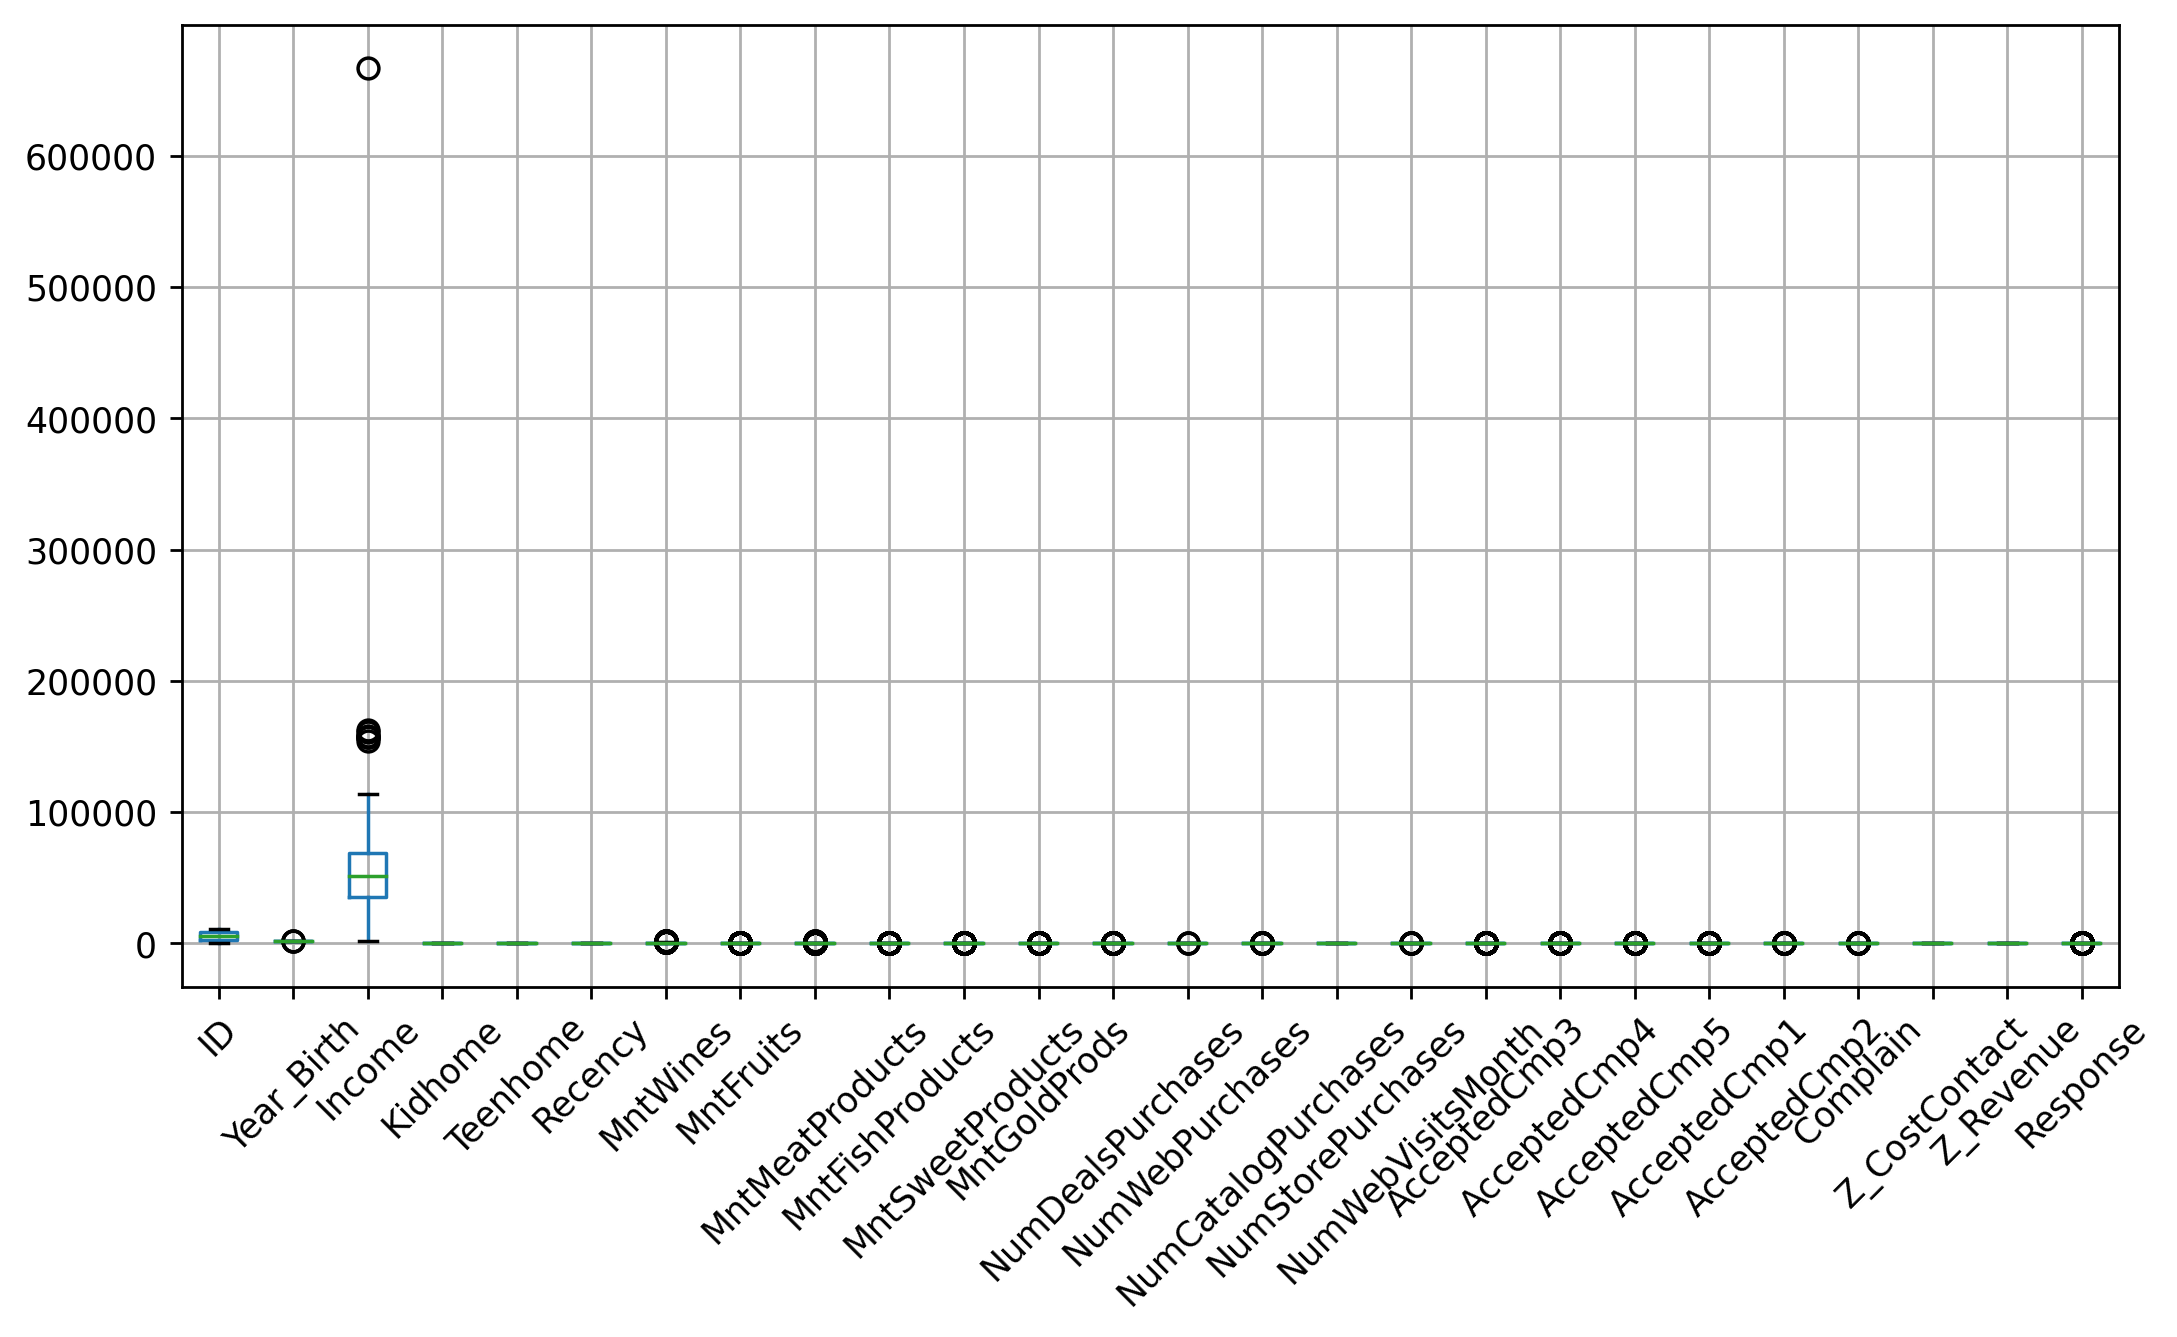

In [ ]:
df.boxplot()
plt.xticks(rotation=45)

In [ ]:
int_columns = df.select_dtypes(include=['number']).columns

In [ ]:
def outlier_detection(data,colname):
    for col in colname:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)

        df[col]=np.where(df[col]> upper,upper,np.where(df[col]< lower,lower,df[col]))

In [ ]:
outlier_detection(df, int_columns)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'ID'),
  Text(2, 0, 'Year_Birth'),
  Text(3, 0, 'Income'),
  Text(4, 0, 'Kidhome'),
  Text(5, 0, 'Teenhome'),
  Text(6, 0, 'Recency'),
  Text(7, 0, 'MntWines'),
  Text(8, 0, 'MntFruits'),
  Text(9, 0, 'MntMeatProducts'),
  Text(10, 0, 'MntFishProducts'),
  Text(11, 0, 'MntSweetProducts'),
  Text(12, 0, 'MntGoldProds'),
  Text(13, 0, 'NumDealsPurchases'),
  Text(14, 0, 'NumWebPurchases'),
  Text(15, 0, 'NumCatalogPurchases'),
  Text(16, 0, 'NumStorePurchases'),
  Text(17, 0, 'NumWebVisitsMonth'),
  Text(18, 0, 'AcceptedCmp3'),
  Text(19, 0, 'AcceptedCmp4'),
  Text(20, 0, 'AcceptedCmp5'),
  Text(21, 0, 'AcceptedCmp1'),
  Text(22, 0, 'AcceptedCmp2'),
  Text(23, 0, 'Complain'),
  Text(24, 0, 'Z_CostContact'),
  Text(25, 0, 'Z_Revenue'),
  Text(26, 0, 'Response')])

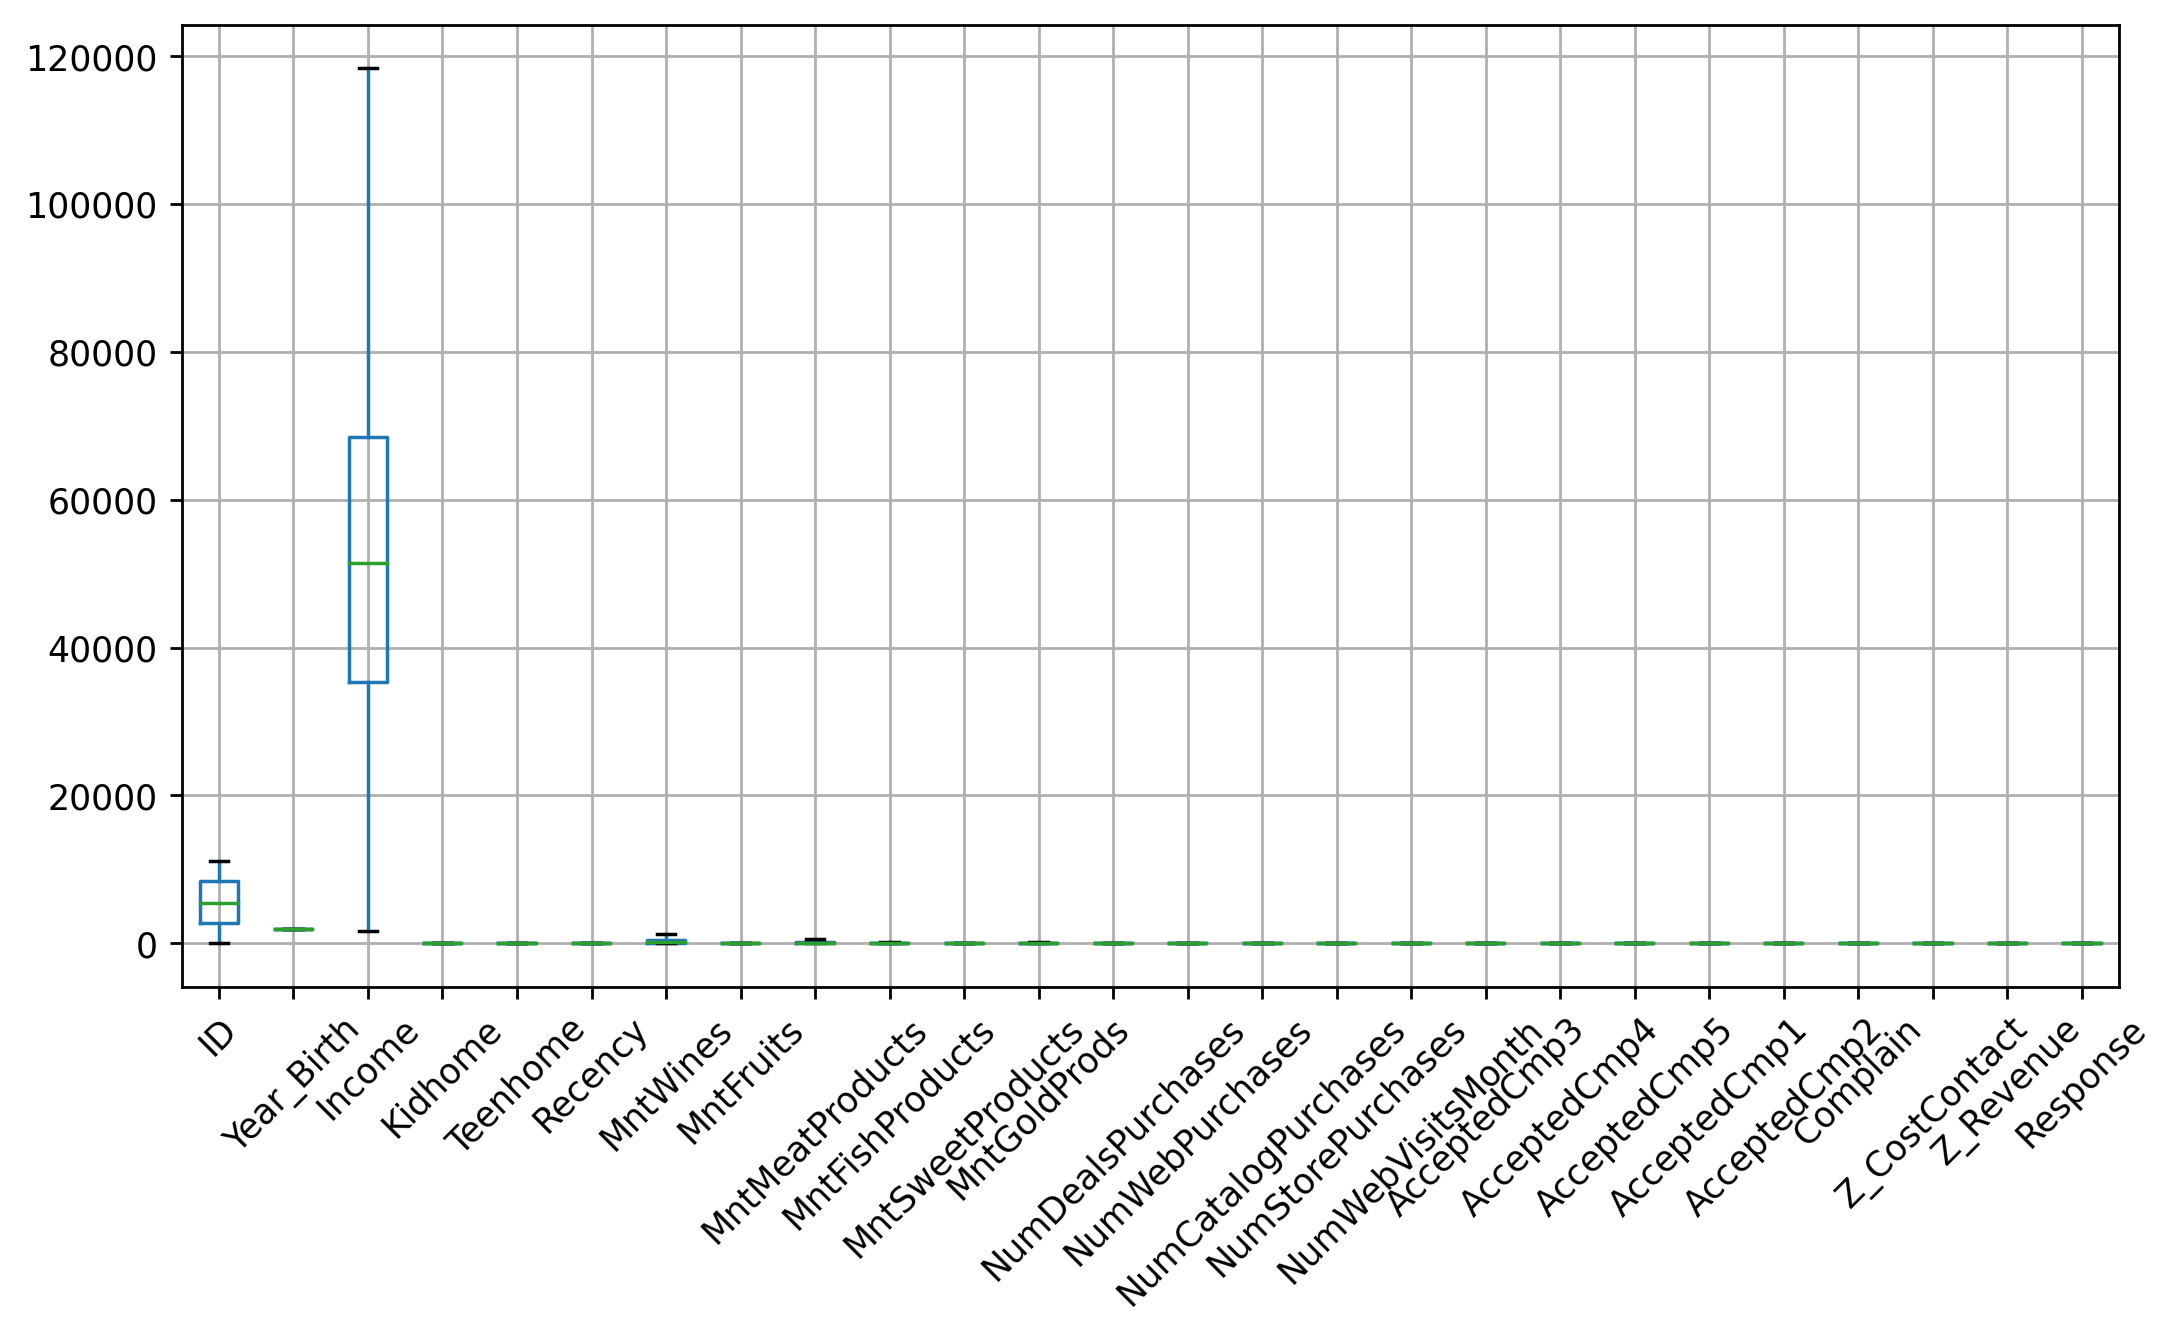

In [ ]:
df.boxplot()
plt.xticks(rotation=45)

In [ ]:
#checking education column to optimize them for later processing
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#finding the values of each column in the education column
print(df['Education'].value_counts())

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


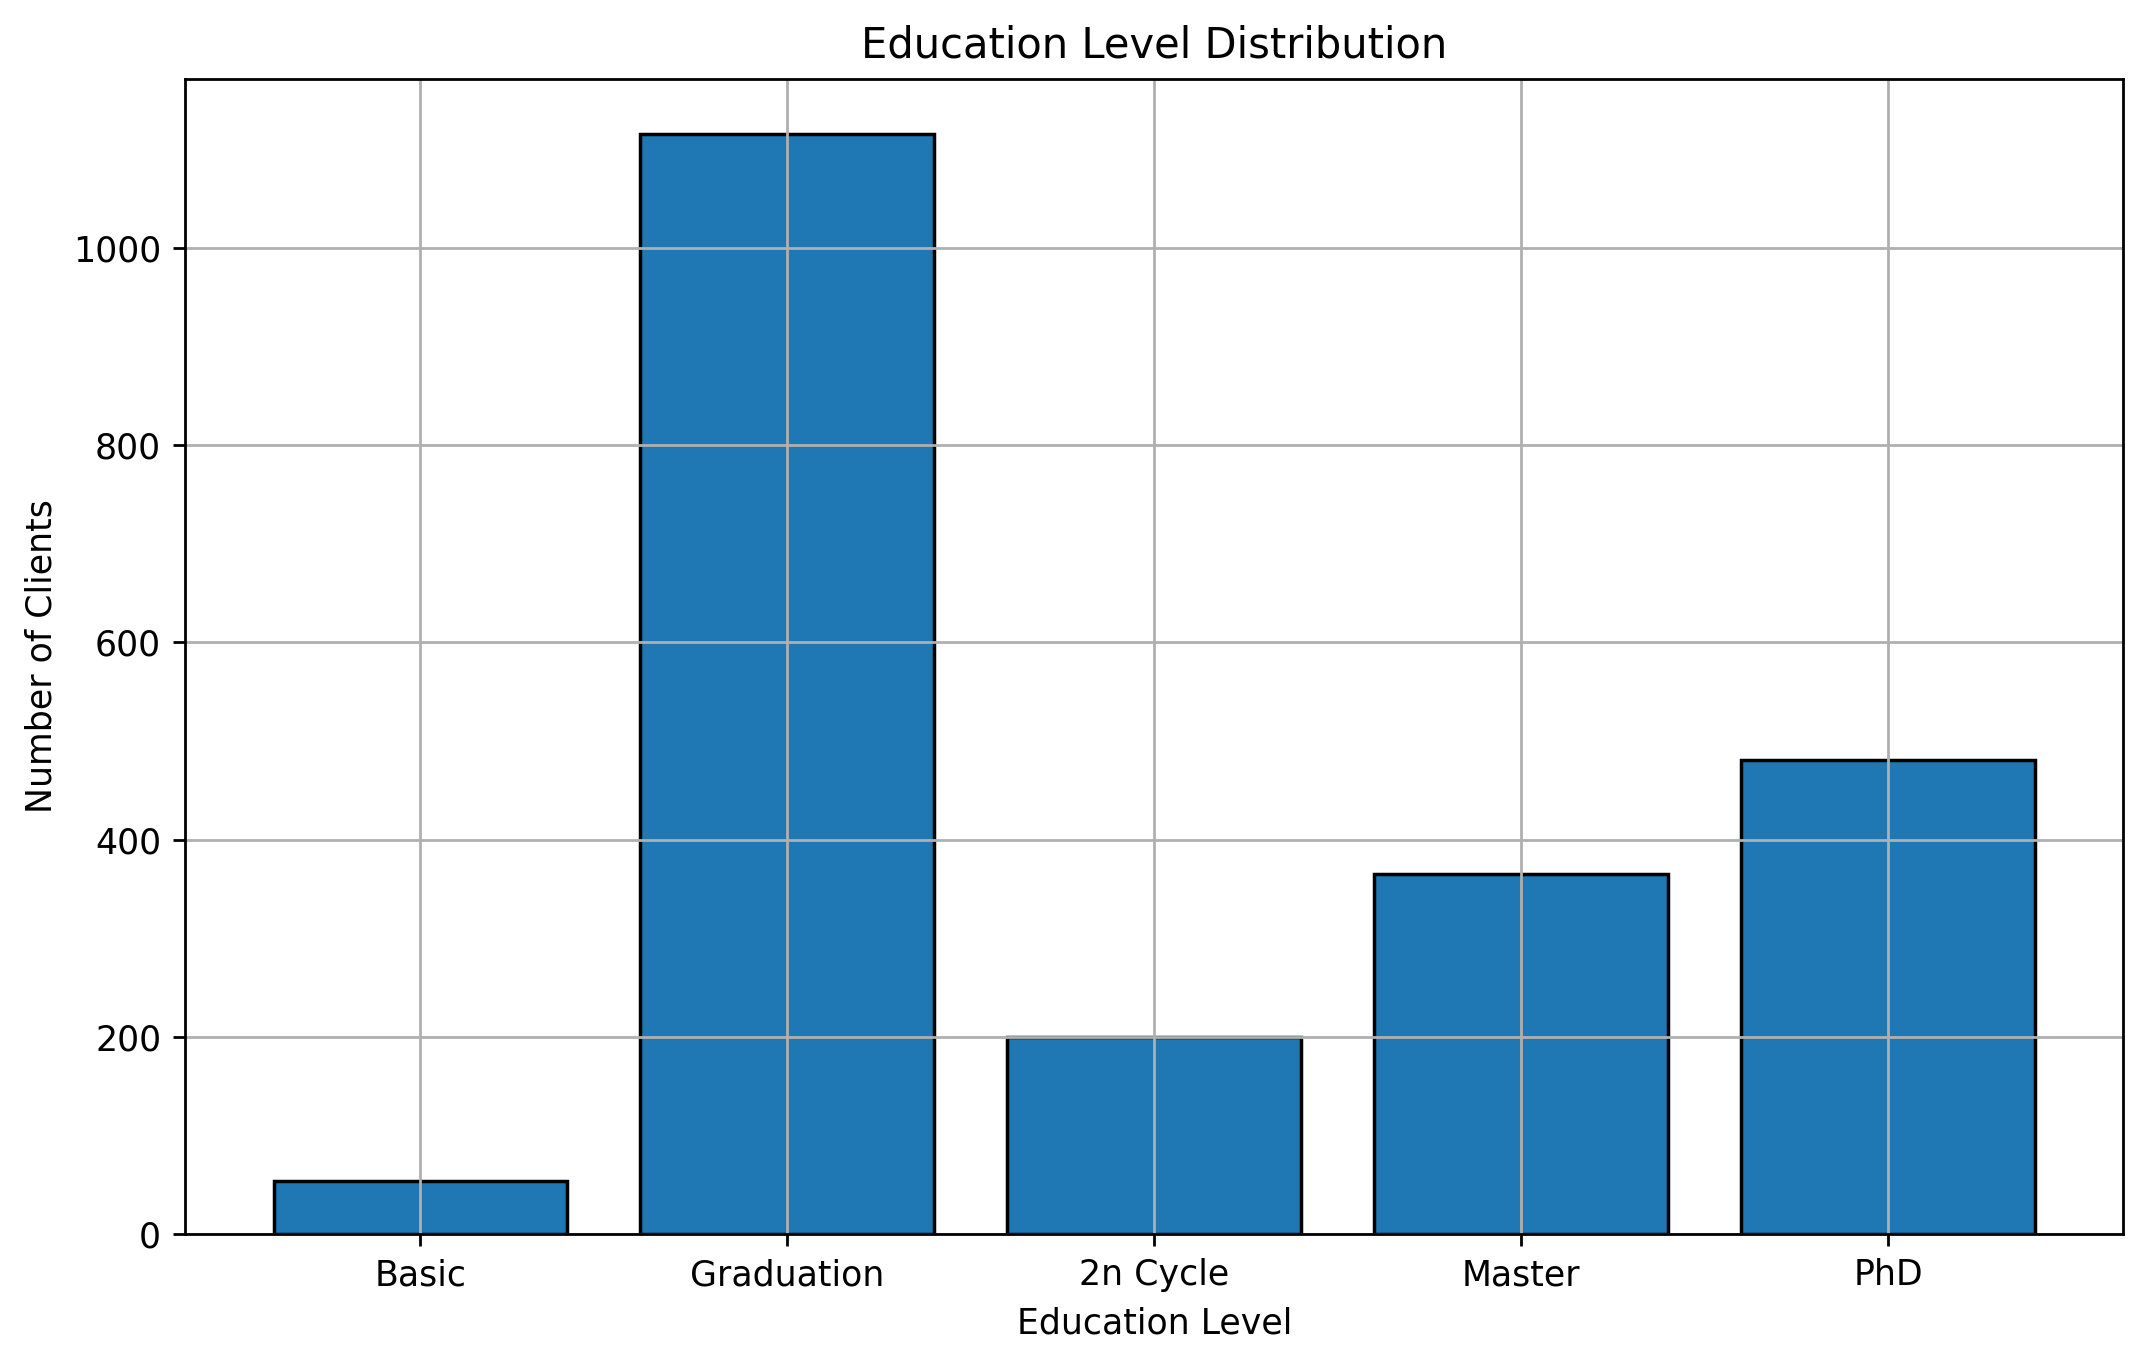

In [ ]:
#assigning numerical values for easier analyisis
df['Education'] = df['Education'].replace({"Basic": 0, "Graduation": 1, "2n Cycle": 2, "Master": 3, "PhD": 4}).astype('int64')

#plot histogram for Education
labels = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
bin_edges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]  # Add an extra bin edge to include all values
plt.figure(figsize=(10, 6))
plt.hist(df['Education'], bins=bin_edges, edgecolor='black', rwidth=0.8)
plt.xticks([0, 1, 2, 3, 4], labels)  # Match labels to numerical values
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

In [ ]:
#checking marital status column to optimize them for later processing
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#finding the values of each column in the education column
print(df['Marital_Status'].value_counts())

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


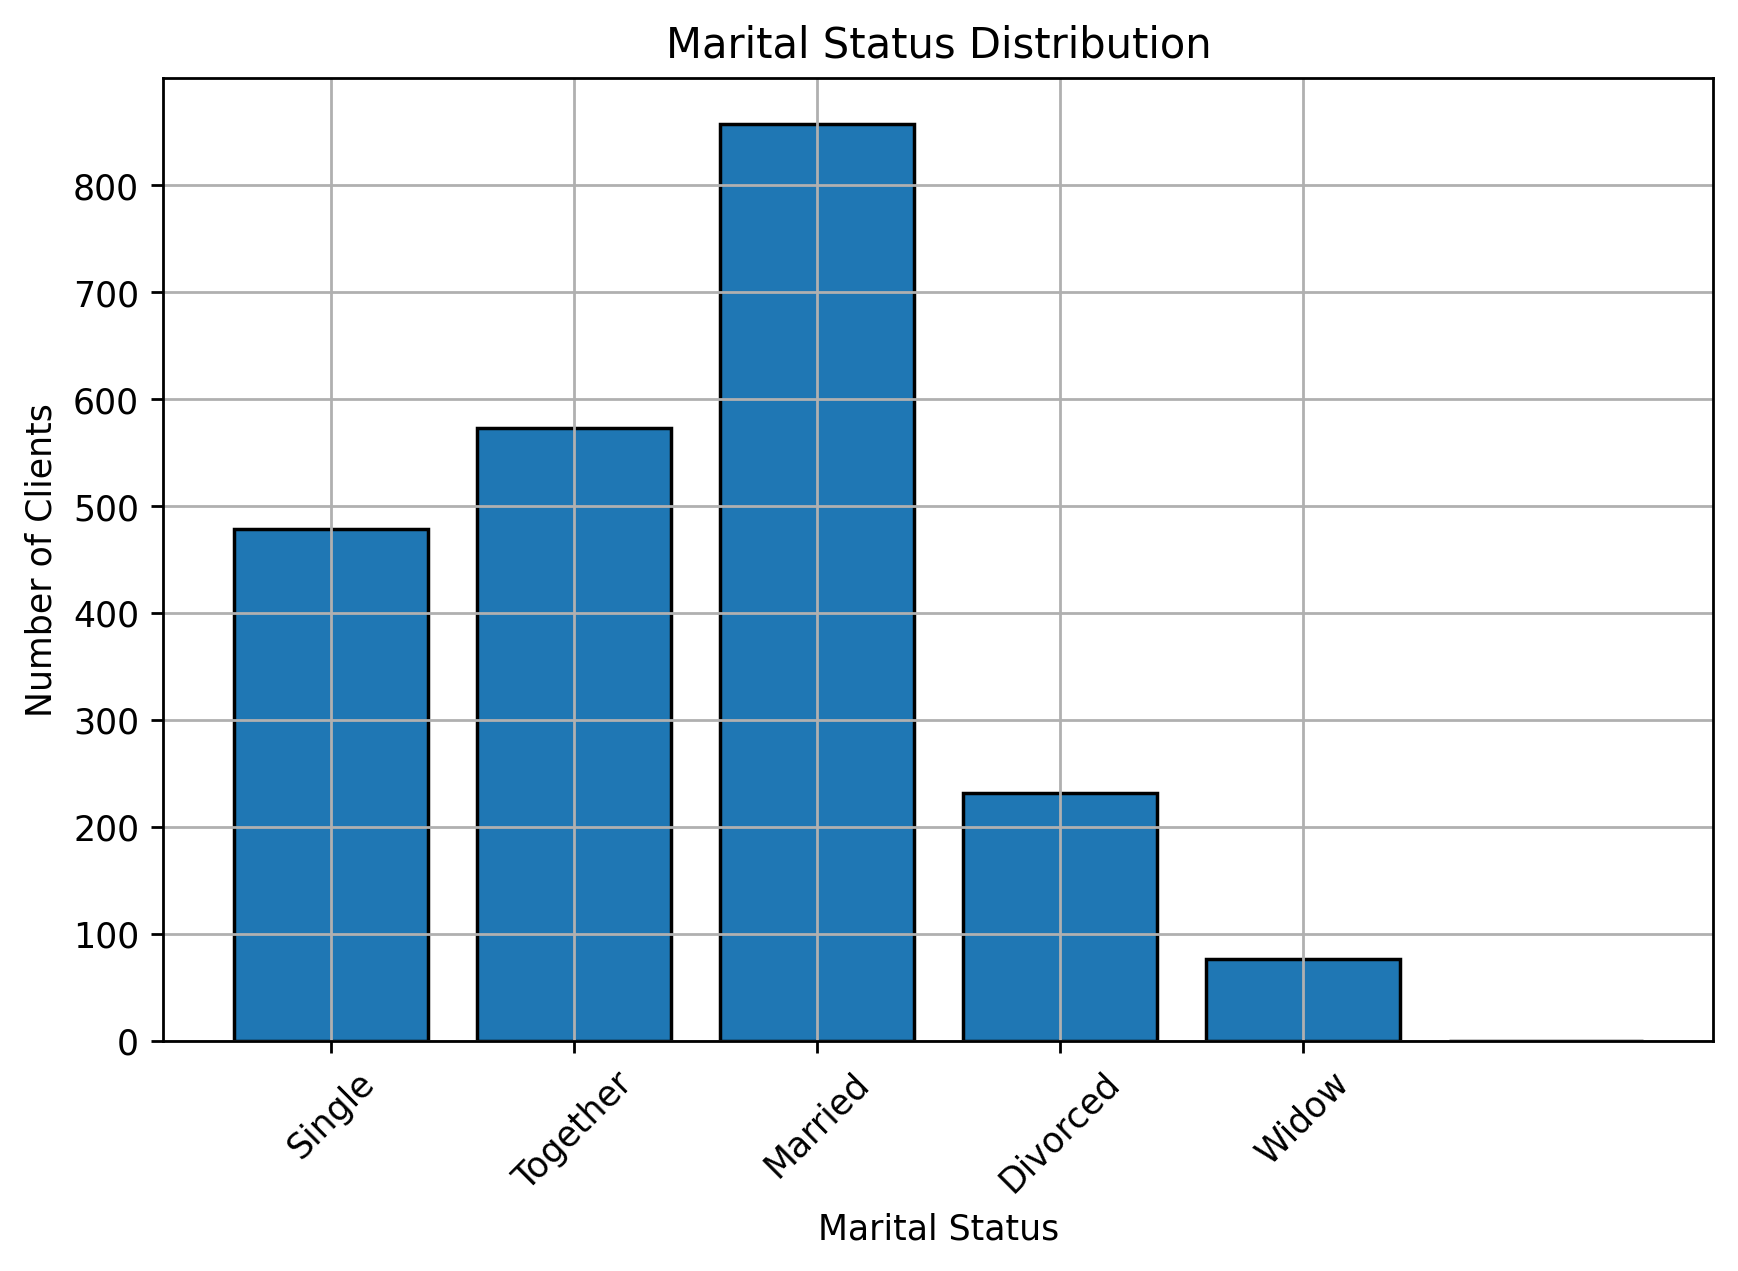

In [ ]:
#simplyfying the marital status by grouping 'single','alone', 'absurd' and 'yolo'
df['Marital_Status'] = df["Marital_Status"].replace({ "Absurd":"Single",
     "YOLO":"Single", "Alone":"Single",})

#plot histogram for Marital Status
bin_edges = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
labels = ['Single', 'Married', 'Together', 'Divorced', 'Widow']
plt.figure(figsize=(8, 5))
plt.hist(df['Marital_Status'], bins=bin_edges, edgecolor='black', rwidth=0.8)
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

In [ ]:
#Feature Engineering

In [ ]:
#Customer's age
df['Age']=2024-df['Year_Birth']
#Total Children
df['Total_Children']=df['Kidhome']+df['Teenhome']
#Total amount spent on all product categories.
product_columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['Total_Spending']=df[product_columns].sum(axis=1)
# Enrollment Duration (in years)
#df['Enrollment_Duration'] = 2024 - pd.to_datetime(df['Dt_Customer']).dt.year
# Total number of accepted campaigns
campaign_columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']
df['Total_Accepted_Campaigns']=df[campaign_columns].sum(axis=1)
#Sum of all purchases (web, catalog, store)
purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Total_Purchases'] = df[purchase_columns].sum(axis=1)
df['Web_Interaction'] = df['NumWebPurchases'] + df['NumWebVisitsMonth']


In [ ]:
print('Z_CostContact:',df['Z_CostContact'].var())
print('Z_Revenue:',df['Z_Revenue'].var())
print('Complain :',df['Complain'].var())
print('Response :',df['Response'].var())
#it means it is not representing any extra information

Z_CostContact: 0.0
Z_Revenue: 0.0
Complain : 0.0
Response : 0.0


In [ ]:
df.drop(columns=['Z_CostContact','Z_Revenue','Complain','Response'])

ID  Year_Birth  Education Marital_Status   Income  Kidhome  \
0      5524.0      1957.0          1         Single  58138.0      0.0   
1      2174.0      1954.0          1         Single  46344.0      1.0   
2      4141.0      1965.0          1       Together  71613.0      0.0   
3      6182.0      1984.0          1       Together  26646.0      1.0   
4      5324.0      1981.0          4        Married  58293.0      1.0   
...       ...         ...        ...            ...      ...      ...   
2235  10870.0      1967.0          1        Married  61223.0      0.0   
2236   4001.0      1946.0          4       Together  64014.0      2.0   
2237   7270.0      1981.0          1       Divorced  56981.0      0.0   
2238   8235.0      1956.0          3       Together  69245.0      0.0   
2239   9405.0      1954.0          4        Married  52869.0      1.0   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  \
0          0.0  04-09-2012     58.0     635.0  ...           0.0   
1          1.0  08-03-2014     38.0      11.0  ...           0.0   
2          0.0  21-08-2013     26.0     426.0  ...           0.0   
3          0.0  10-02-2014     26.0      11.0  ...           0.0   
4          0.0  19-01-2014     94.0     173.0  ...           0.0   
...        ...         ...      ...       ...  ...           ...   
2235       1.0  13-06-2013     46.0     709.0  ...           0.0   
2236       1.0  10-06-2014     56.0     406.0  ...           0.0   
2237       0.0  25-01-2014     91.0     908.0  ...           0.0   
2238       1.0  24-01-2014      8.0     428.0  ...           0.0   
2239       1.0  15-10-2012     40.0      84.0  ...           0.0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2   Age  Total_Children  \
0              0.0           0.0           0.0  67.0             0.0   
1              0.0           0.0           0.0  70.0             2.0   
2              0.0           0.0           0.0  59.0             0.0   
3              0.0           0.0           0.0  40.0             1.0   
4              0.0           0.0           0.0  43.0             1.0   
...            ...           ...           ...   ...             ...   
2235           0.0           0.0           0.0  57.0             1.0   
2236           0.0           0.0           0.0  78.0             3.0   
2237           0.0           0.0           0.0  43.0             0.0   
2238           0.0           0.0           0.0  68.0             1.0   
2239           0.0           0.0           0.0  70.0             2.0   

      Total_Spending  Total_Accepted_Campaigns  Total_Purchases  \
0             1550.0                       0.0             22.0   
1               27.0                       0.0              4.0   
2              776.0                       0.0             20.0   
3               53.0                       0.0              6.0   
4              422.0                       0.0             14.0   
...              ...                       ...              ...   
2235          1183.5                       0.0             16.0   
2236           444.0                       0.0             15.0   
2237          1241.0                       0.0             18.0   
2238           843.0                       0.0             21.0   
2239           172.0                       0.0              8.0   

      Web_Interaction  
0                15.0  
1                 6.0  
2                12.0  
3                 8.0  
4                10.0  
...               ...  
2235             14.0  
2236             15.0  
2237              8.0  
2238              9.0  
2239             10.0  

[2216 rows x 31 columns]

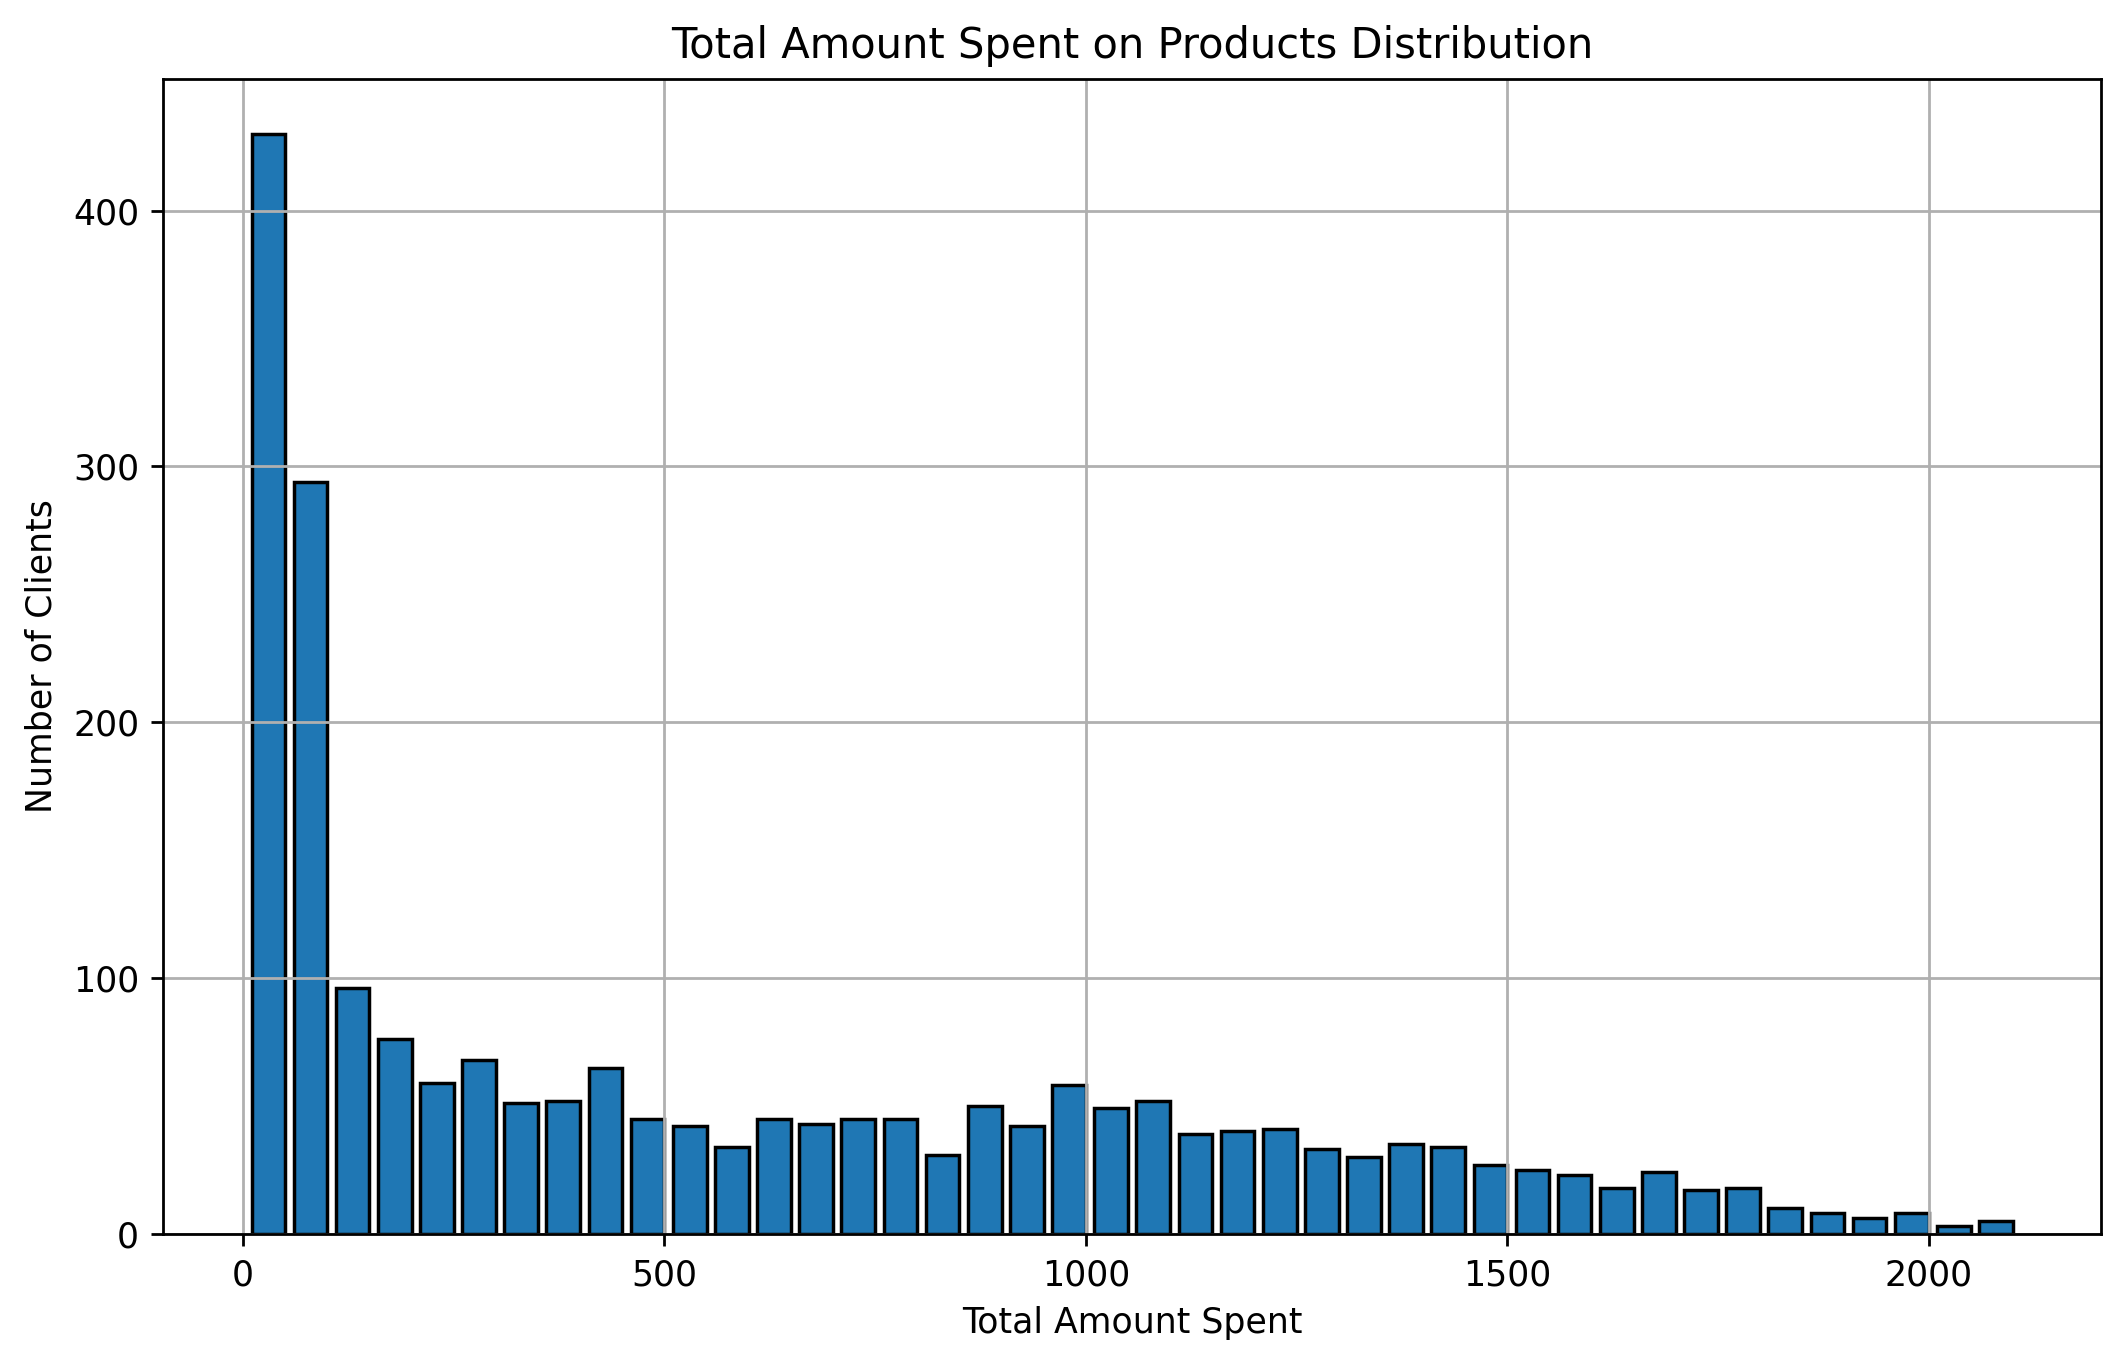

In [ ]:
#plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Total_Spending'], bins=range(int(df['Total_Spending'].min()), int(df['Total_Spending'].max() + 50), 50), edgecolor='black', rwidth=0.8)
plt.title('Total Amount Spent on Products Distribution')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

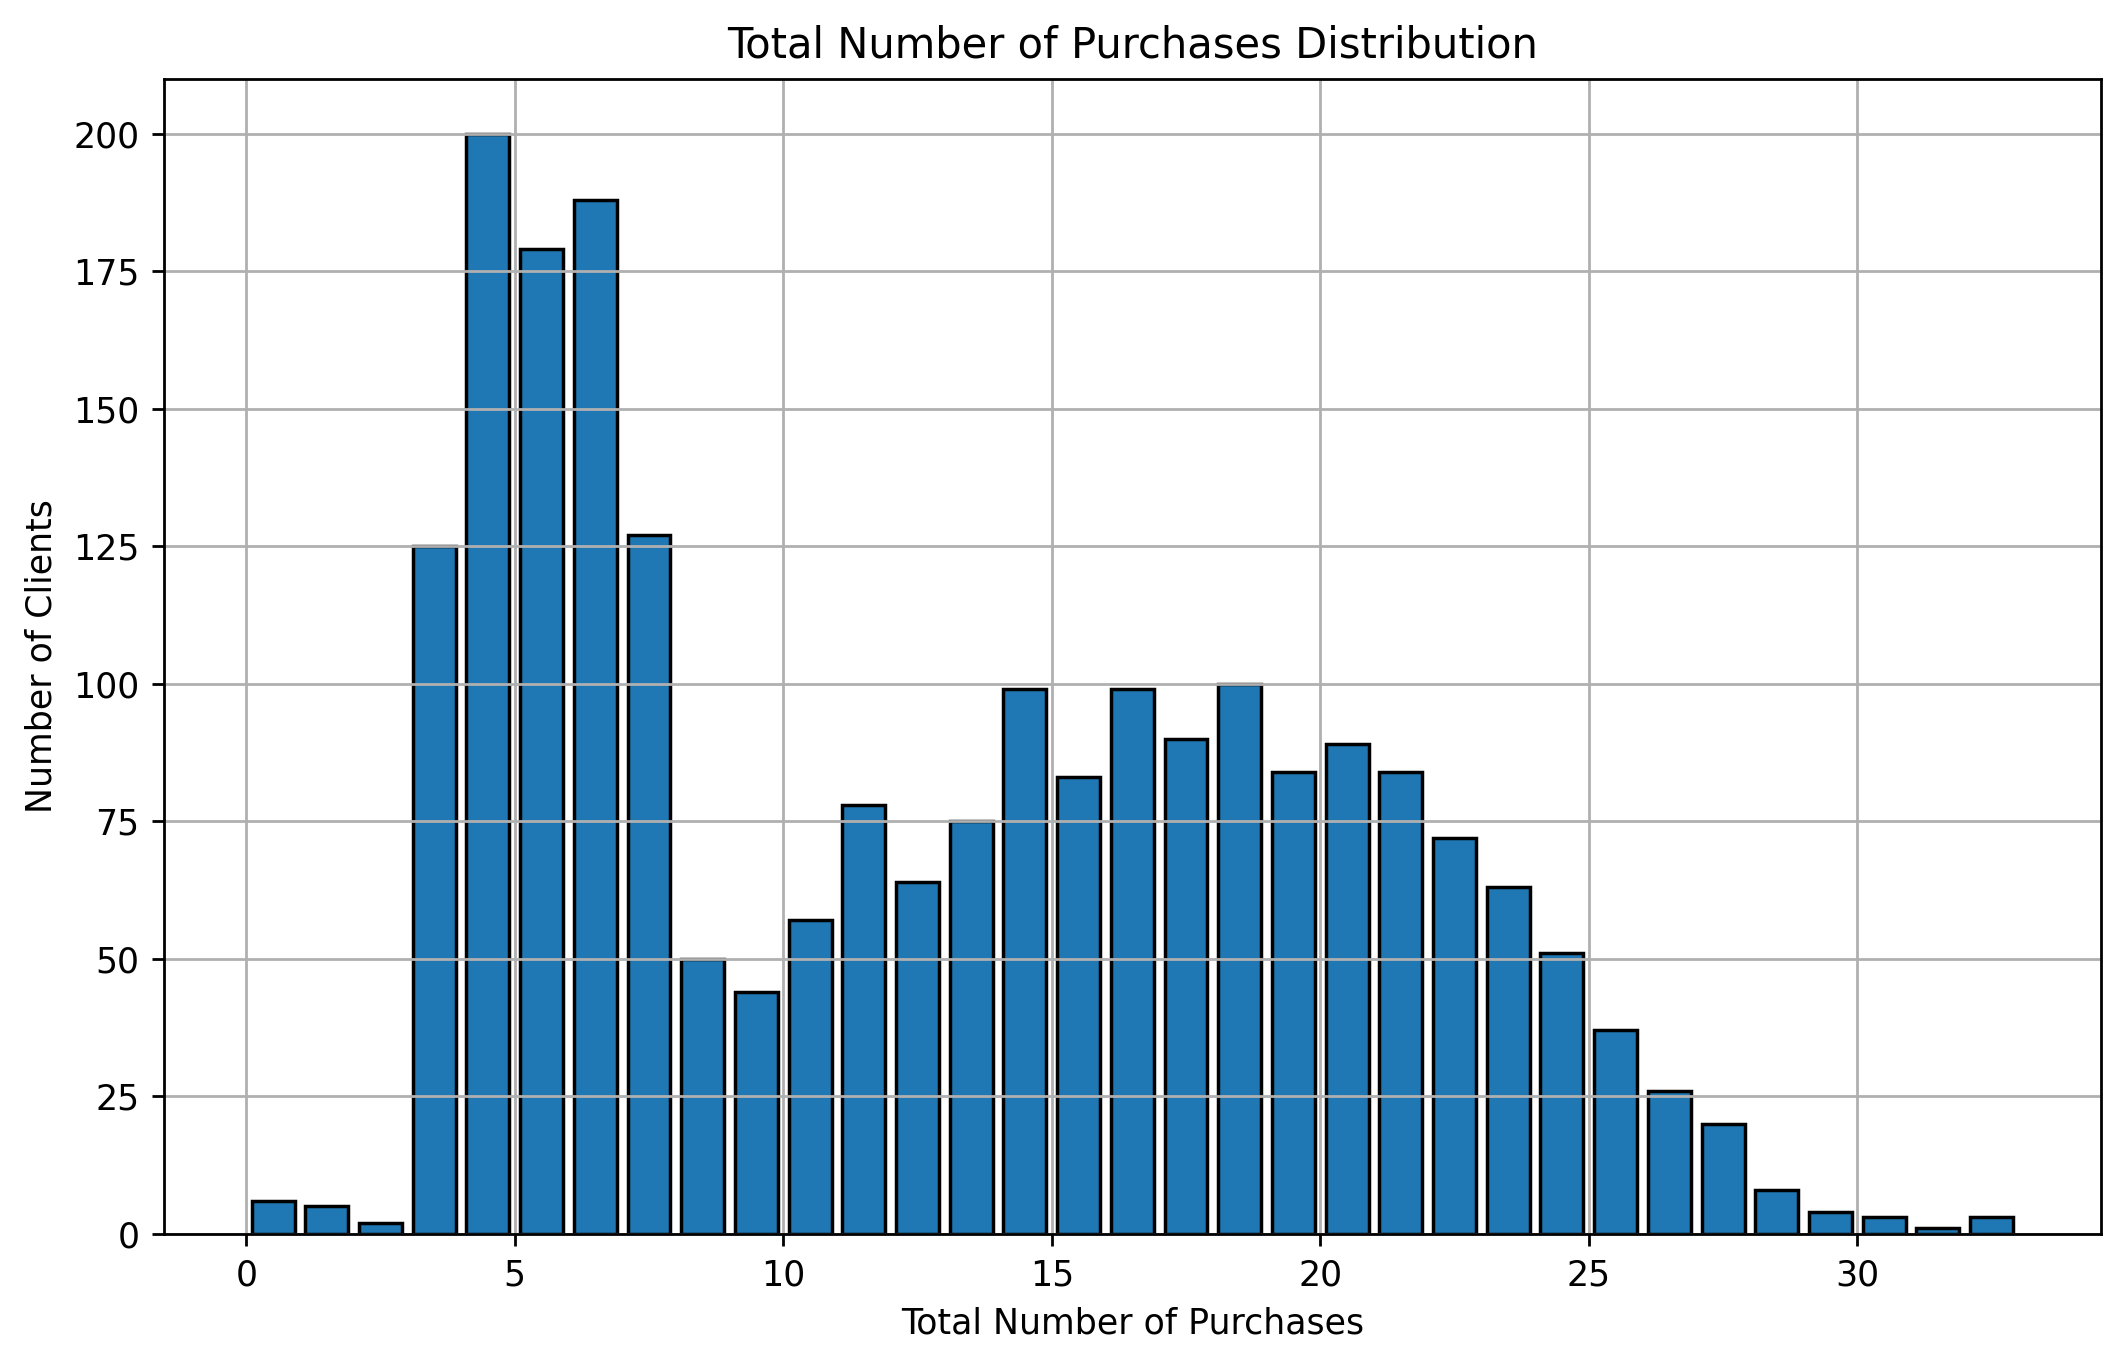

In [ ]:
#plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Total_Purchases'], bins=range(int(df['Total_Purchases'].min()), int(df['Total_Purchases'].max() + 2)), edgecolor='black', rwidth=0.8)
plt.title('Total Number of Purchases Distribution')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Number of Clients')
plt.grid(True)
plt.show()

In [ ]:
# Select relevant columns
reduced_df = df[['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Total_Children',
                 'Recency', 'Total_Spending', 'Total_Accepted_Campaigns',
                 'NumDealsPurchases', 'Total_Purchases', 'Web_Interaction']]
reduced_df=reduced_df.drop(columns=['ID'])
reduced_df

Age  Education Marital_Status   Income  Total_Children  Recency  \
0     67.0          1         Single  58138.0             0.0     58.0   
1     70.0          1         Single  46344.0             2.0     38.0   
2     59.0          1       Together  71613.0             0.0     26.0   
3     40.0          1       Together  26646.0             1.0     26.0   
4     43.0          4        Married  58293.0             1.0     94.0   
...    ...        ...            ...      ...             ...      ...   
2235  57.0          1        Married  61223.0             1.0     46.0   
2236  78.0          4       Together  64014.0             3.0     56.0   
2237  43.0          1       Divorced  56981.0             0.0     91.0   
2238  68.0          3       Together  69245.0             1.0      8.0   
2239  70.0          4        Married  52869.0             2.0     40.0   

      Total_Spending  Total_Accepted_Campaigns  NumDealsPurchases  \
0             1550.0                       0.0                3.0   
1               27.0                       0.0                2.0   
2              776.0                       0.0                1.0   
3               53.0                       0.0                2.0   
4              422.0                       0.0                5.0   
...              ...                       ...                ...   
2235          1183.5                       0.0                2.0   
2236           444.0                       0.0                6.0   
2237          1241.0                       0.0                1.0   
2238           843.0                       0.0                2.0   
2239           172.0                       0.0                3.0   

      Total_Purchases  Web_Interaction  
0                22.0             15.0  
1                 4.0              6.0  
2                20.0             12.0  
3                 6.0              8.0  
4                14.0             10.0  
...               ...              ...  
2235             16.0             14.0  
2236             15.0             15.0  
2237             18.0              8.0  
2238             21.0              9.0  
2239              8.0             10.0  

[2216 rows x 11 columns]

In [ ]:
#Encoding
ordinal_encoder = OrdinalEncoder()
reduced_df[['Marital_Status', 'Education']] = ordinal_encoder.fit_transform(reduced_df[['Marital_Status', 'Education']])

In [ ]:
#standardization
sc = StandardScaler()

x = sc.fit_transform(reduced_df)
pd.DataFrame(x)

0         1         2         3         4         5         6   \
0     1.008423 -0.819198  0.253130  0.297483 -1.264803  0.310532  1.790000   
1     1.263348 -0.819198  0.253130 -0.262669  1.405806 -0.380509 -0.991090   
2     0.328625 -0.819198  1.194297  0.937474 -1.264803 -0.795134  0.376629   
3    -1.285895 -0.819198  1.194297 -1.198219  0.070501 -0.795134 -0.943612   
4    -1.030971  1.529240 -0.688038  0.304845  0.070501  1.554407 -0.269796   
...        ...       ...       ...       ...       ...       ...       ...   
2211  0.158676 -0.819198 -0.688038  0.444004  0.070501 -0.104093  1.120749   
2212  1.943146  1.529240  1.194297  0.576562  2.741110  0.241428 -0.229623   
2213 -1.030971 -0.819198 -1.629205  0.242532 -1.264803  1.450751  1.225747   
2214  1.093398  0.746428  1.194297  0.825007  0.070501 -1.417072  0.498975   
2215  1.263348  1.529240 -0.688038  0.047234  1.405806 -0.311405 -0.726311   

       7         8         9         10  
0     0.0  0.510352  1.328561  1.617782  
1     0.0 -0.140736 -1.189071 -0.967972  
2     0.0 -0.791824  1.048824  0.755864  
3     0.0 -0.140736 -0.909334 -0.393360  
4     0.0  1.812527  0.209613  0.181252  
...   ...       ...       ...       ...  
2211  0.0 -0.140736  0.489350  1.330476  
2212  0.0  2.463615  0.349482  1.617782  
2213  0.0 -0.791824  0.769087 -0.393360  
2214  0.0 -0.140736  1.188692 -0.106054  
2215  0.0  0.510352 -0.629597  0.181252  

[2216 rows x 11 columns]

In [ ]:
#PCA
pca=PCA()
pcs=pca.fit_transform(x)
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0     2.364051  1.244703  0.852704  0.740730  0.352362 -0.626170 -1.373908   
1    -1.719811 -0.253134 -1.133455  0.163005  0.309258 -1.718216  0.572123   
2     1.798638 -0.382114  0.446697  0.286175  1.619939 -0.416745 -0.851460   
3    -1.846428 -0.936180  0.777270  0.225326  1.593626  0.369353  0.220334   
4    -0.107037  1.313798  0.079162  0.333849 -1.630447  1.799883  0.769191   
...        ...       ...       ...       ...       ...       ...       ...   
2211  1.096144  0.818714  1.057805 -0.171815 -0.213657 -0.617525 -0.463227   
2212 -0.399966  4.202082 -2.282573  0.574346  0.436739  0.008037  0.687233   
2213  1.491909 -1.253087  1.754627  0.412645 -1.910683  0.087483 -0.118686   
2214  1.517975  0.443596 -1.370376 -0.602162  1.554158 -0.239515  0.148992   
2215 -0.980903  1.264796 -1.826041 -1.030111 -0.727971 -0.122045  0.117736   

            7         8         9             10  
0     0.380094 -0.543015  0.355763  3.169175e-17  
1    -0.386518  0.045701  0.119882  4.231800e-17  
2    -0.374199  0.632716 -0.175172  1.495606e-17  
3     0.120904 -0.111250 -0.153213 -1.835305e-17  
4     1.054782  0.602888  0.053972  3.174624e-18  
...        ...       ...       ...           ...  
2211 -0.797745 -0.377662  0.476686  1.585517e-19  
2212 -0.414738  0.288740  0.175106  5.010422e-19  
2213  0.156446 -0.526218 -0.091370  2.205423e-19  
2214 -0.161674  0.043617 -0.548789  5.798032e-19  
2215 -0.312766  0.241455  0.168780 -8.567669e-19  

[2216 rows x 11 columns]

In [ ]:
pca.explained_variance_ratio_

array([2.94116420e-01, 1.79827054e-01, 1.15447304e-01, 1.02227771e-01,
       9.81839885e-02, 8.37453357e-02, 6.15005494e-02, 3.82289108e-02,
       1.45340073e-02, 1.21886596e-02, 5.68252650e-35])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29411642, 0.47394347, 0.58939078, 0.69161855, 0.78980254,
       0.87354787, 0.93504842, 0.97327733, 0.98781134, 1.        ,
       1.        ])

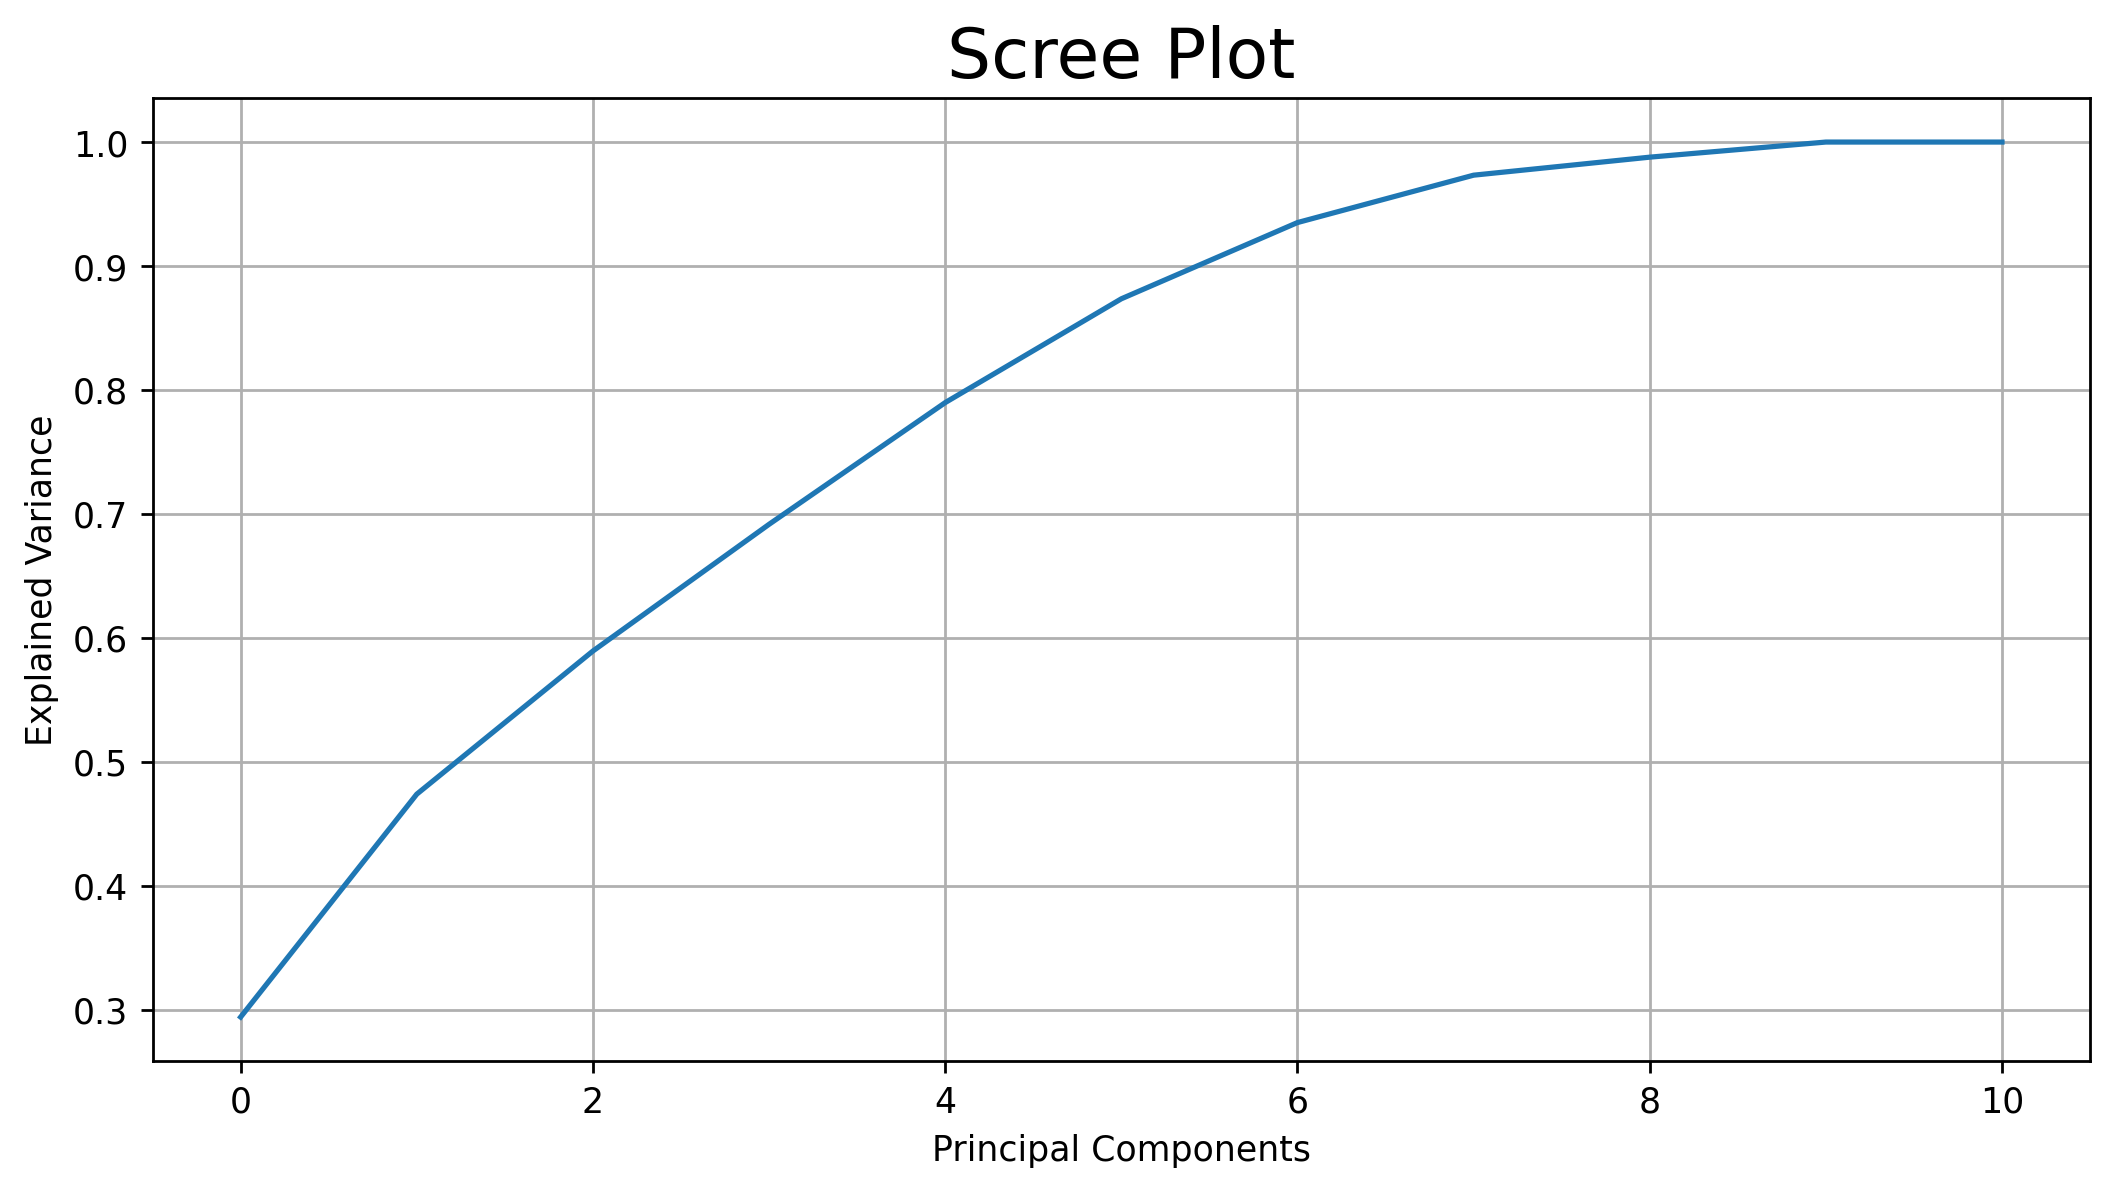

In [ ]:
# 1) plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)
plt.grid(True)

In [ ]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcs

array([[ 2.36405066,  1.24470301],
       [-1.71981136, -0.25313426],
       [ 1.7986377 , -0.38211375],
       ...,
       [ 1.49190926, -1.25308733],
       [ 1.51797464,  0.44359617],
       [-0.98090334,  1.26479608]])

In [ ]:
data= pd.DataFrame(pcs,columns=['PC1','PC2'])
data

PC1       PC2
0     2.364051  1.244703
1    -1.719811 -0.253134
2     1.798638 -0.382114
3    -1.846428 -0.936180
4    -0.107037  1.313798
...        ...       ...
2211  1.096144  0.818714
2212 -0.399966  4.202082
2213  1.491909 -1.253087
2214  1.517975  0.443596
2215 -0.980903  1.264796

[2216 rows x 2 columns]

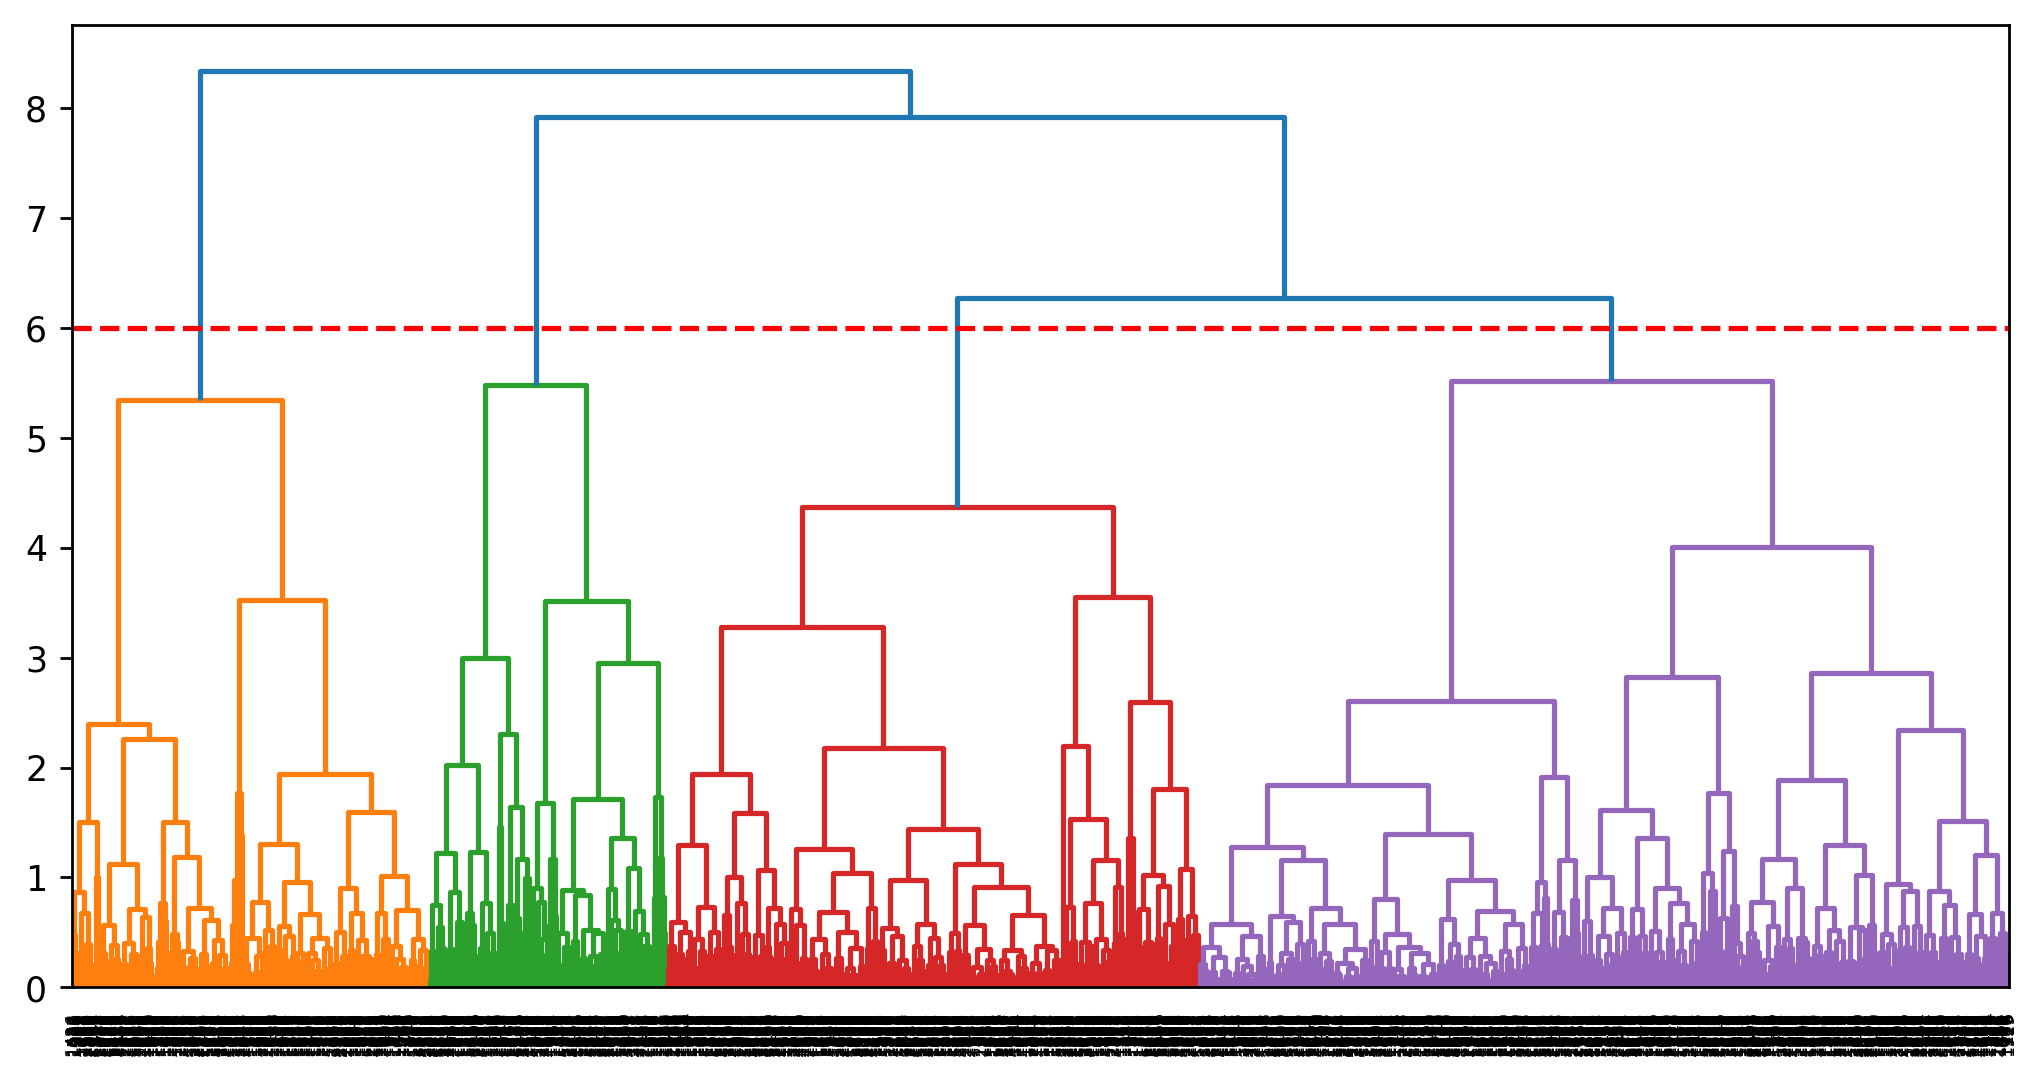

In [ ]:
# Clustering analysis
from scipy.cluster import hierarchy
lk=hierarchy.linkage(data, method='complete')
dendrogram= hierarchy.dendrogram(lk)
plt.axhline(y=6,linestyle='--',color='red')

In [ ]:
hc = AgglomerativeClustering(n_clusters=4)

ypred = hc.fit_predict(data)
ypred

array([0, 1, 0, ..., 2, 0, 3])

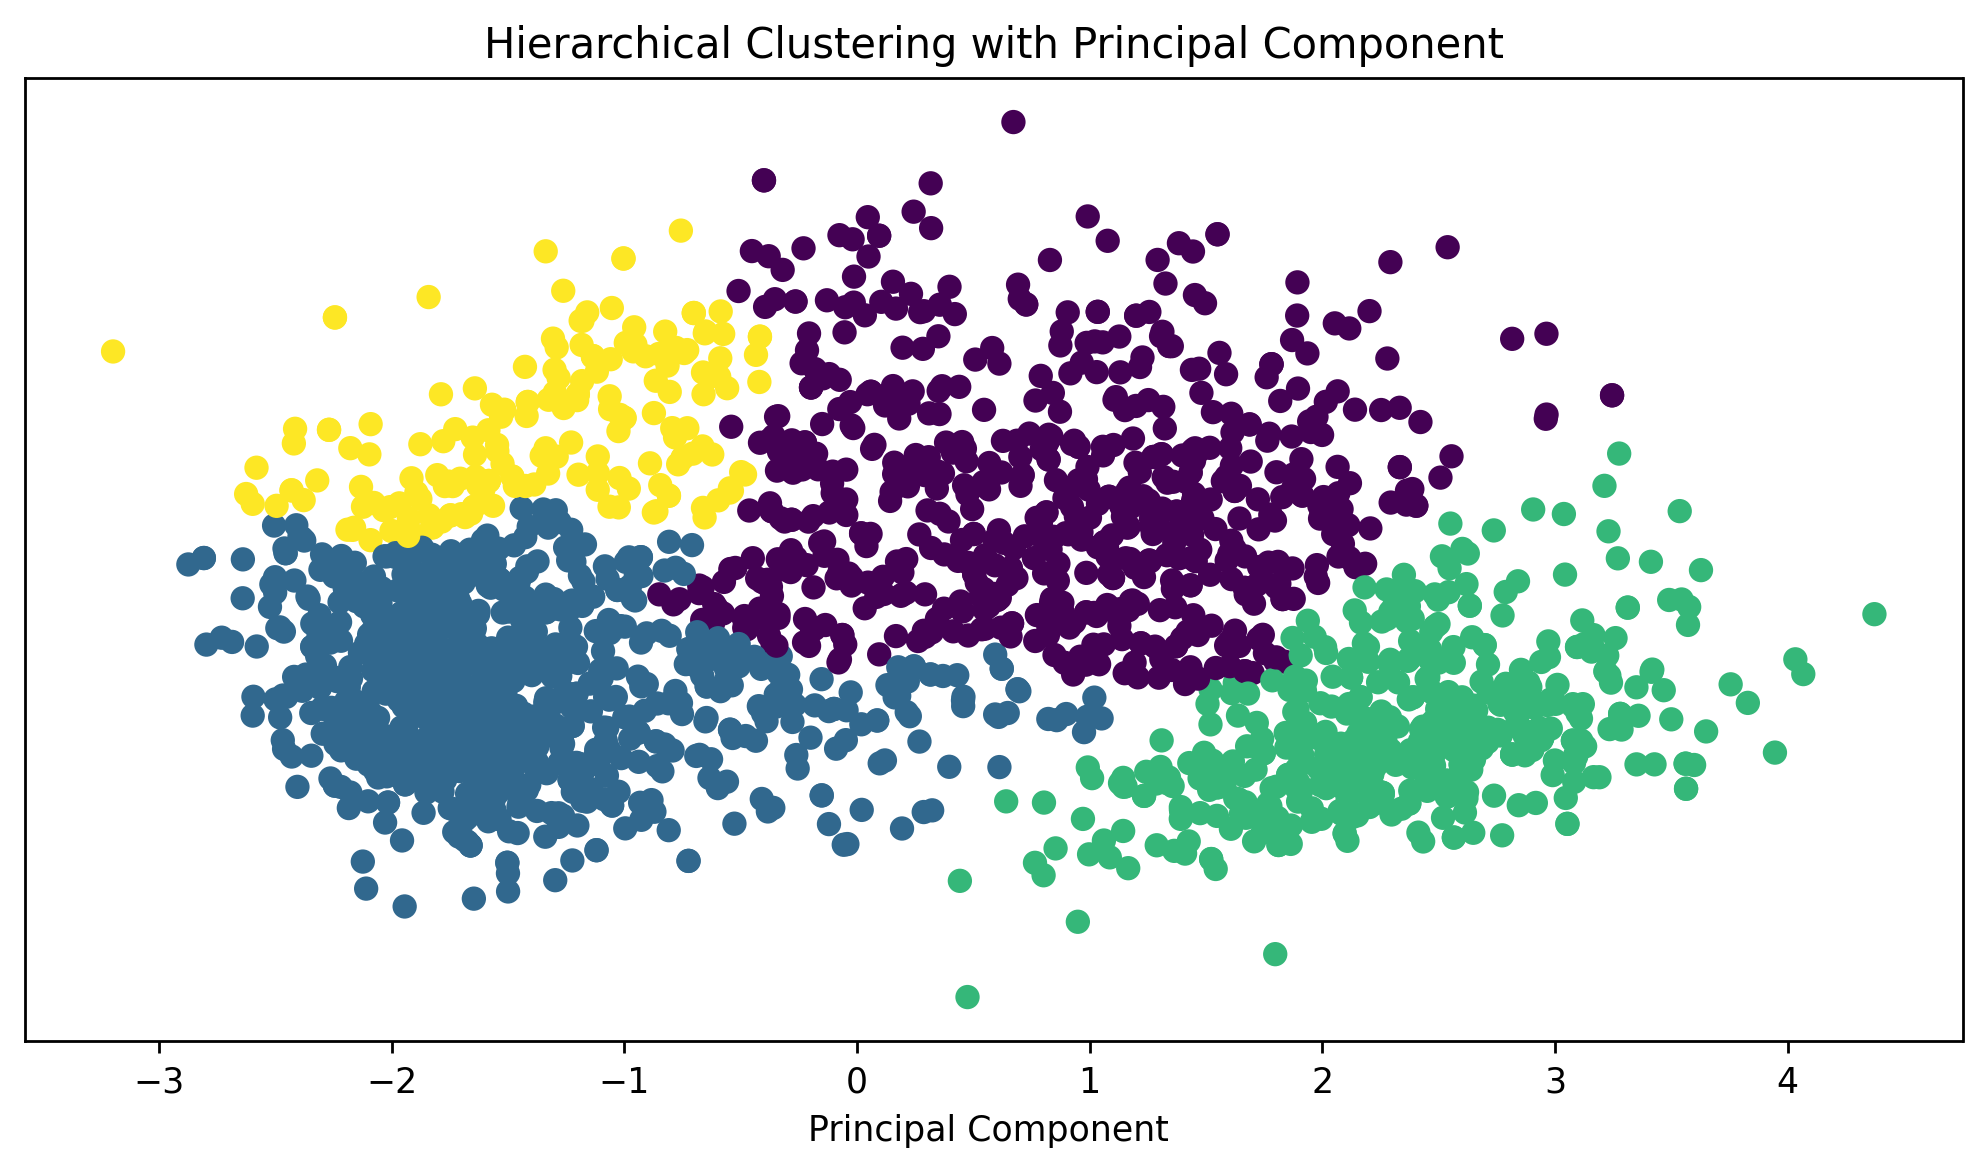

In [ ]:
plt.scatter(data['PC1'], data['PC2'], c=ypred, cmap='viridis')
plt.xlabel('Principal Component ')
plt.title('Hierarchical Clustering with Principal Component')
plt.yticks([])  # Hide y-axis
plt.show()


In [ ]:
silhouette_score(data,ypred)

0.4139358584248706

In [ ]:
from sklearn.cluster import KMeans
km = KMeans()
yp = km.fit_predict(data) #calculate ED between each data point and each centroid.predict:-tells datapoints belongs to which label
yp

array([7, 2, 3, ..., 1, 7, 6], dtype=int32)

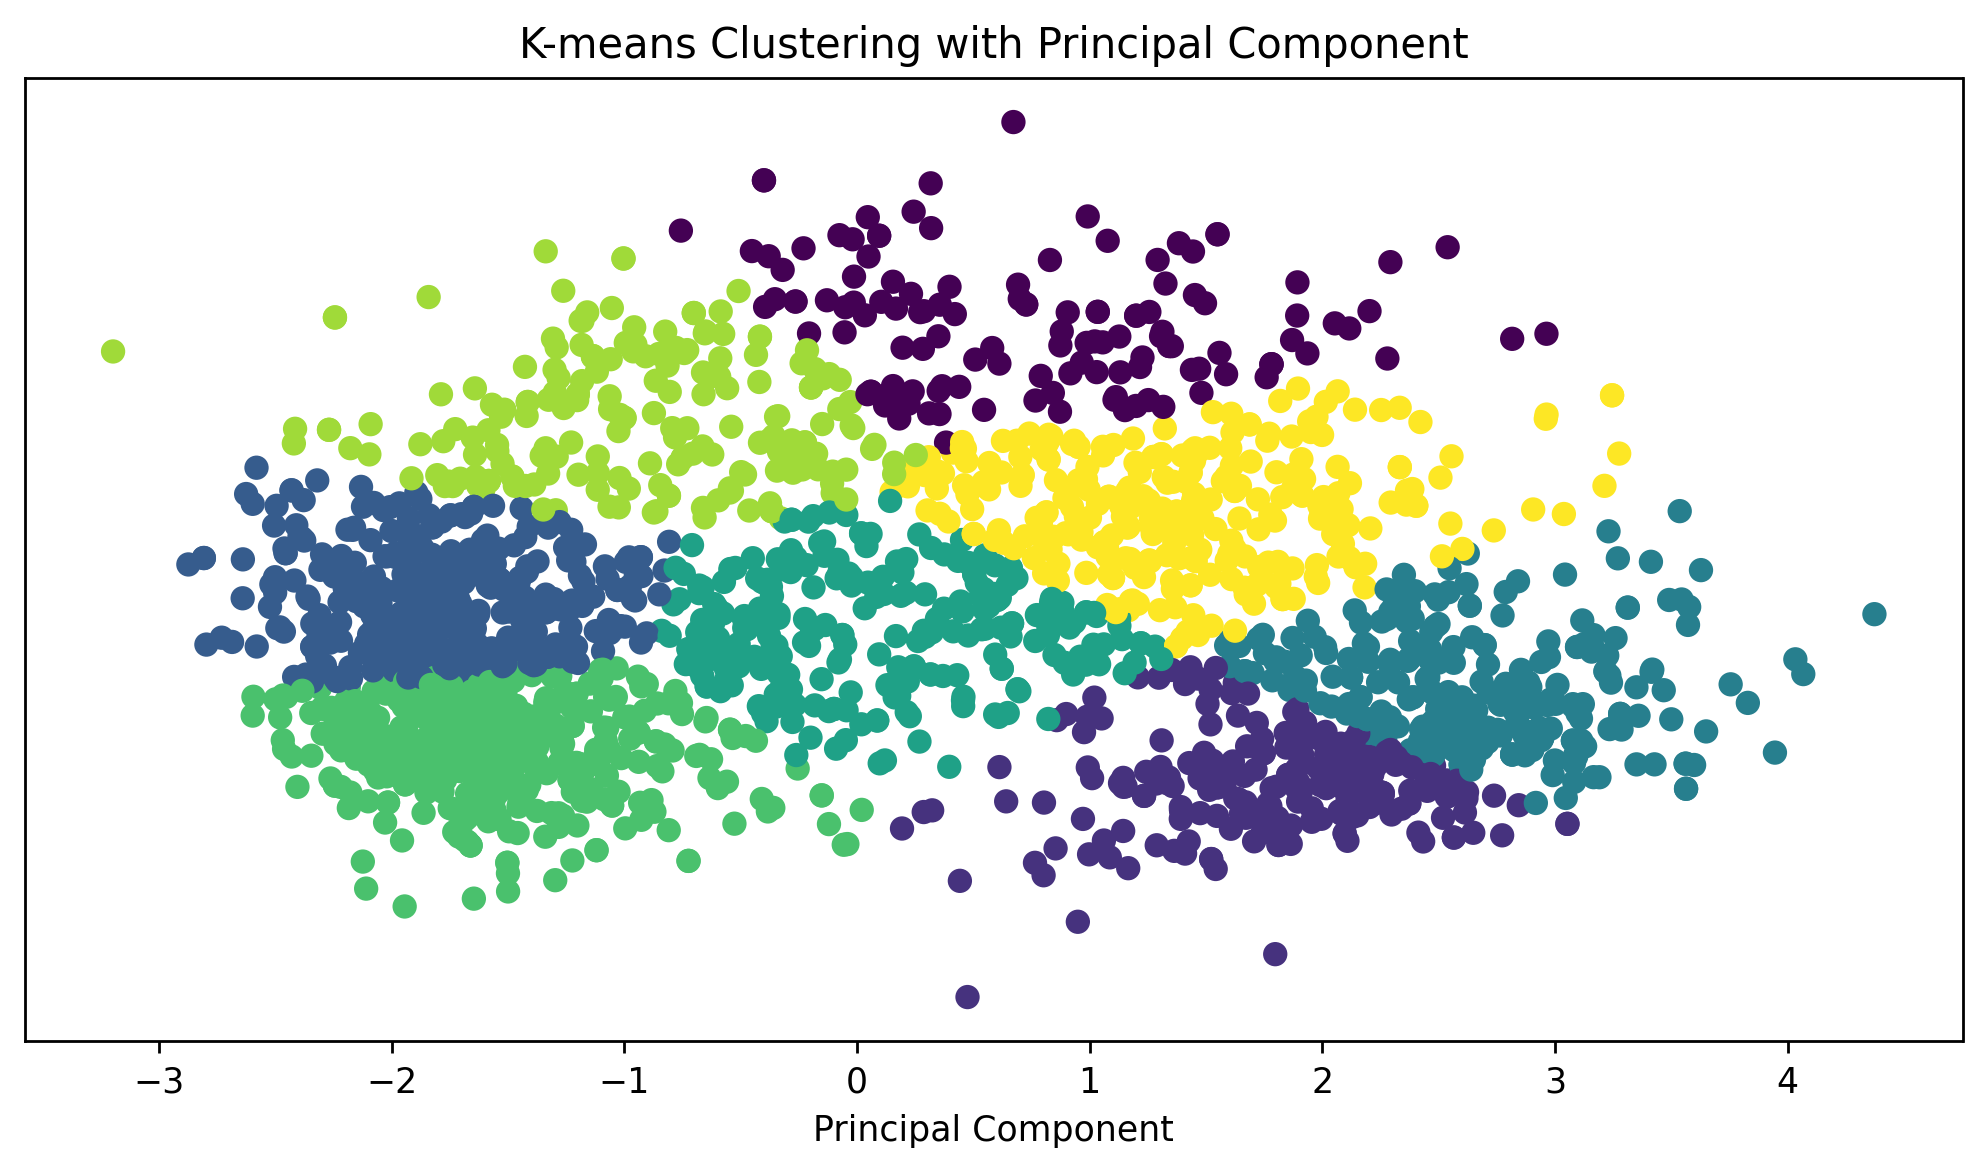

In [ ]:
plt.scatter(data['PC1'], data['PC2'], c=yp, cmap='viridis')
plt.xlabel('Principal Component')
plt.title('K-means Clustering with Principal Component')
plt.yticks([])  # Hide y-axis
plt.show()

In [ ]:
silhouette_score(data,yp)

0.3723260301434235

In [ ]:
km.cluster_centers_

array([[ 0.78301779,  2.83559326],
       [ 1.77518695, -1.56893975],
       [-1.78287372,  0.16726511],
       [ 2.68836449, -0.63906136],
       [ 0.07858142, -0.07961541],
       [-1.58080845, -1.18621716],
       [-0.94433419,  1.91769225],
       [ 1.39890544,  1.05962081]])

In [ ]:
km.inertia_

1191.255522411678

In [ ]:
#Elbow graph
wcss = []

for i in range(2, 11):
    km = KMeans(n_clusters=i,random_state=42)
    km.fit_predict(data)
    wcss.append(km.inertia_)
wcss

[5301.1999956570035,
 2966.5992819930166,
 2321.950065008329,
 1868.8295148718094,
 1545.407472010004,
 1349.4443320011871,
 1191.2021009189984,
 1075.6686330558286,
 968.740024043945]

Text(0.5, 1.0, 'Elbow Graph')

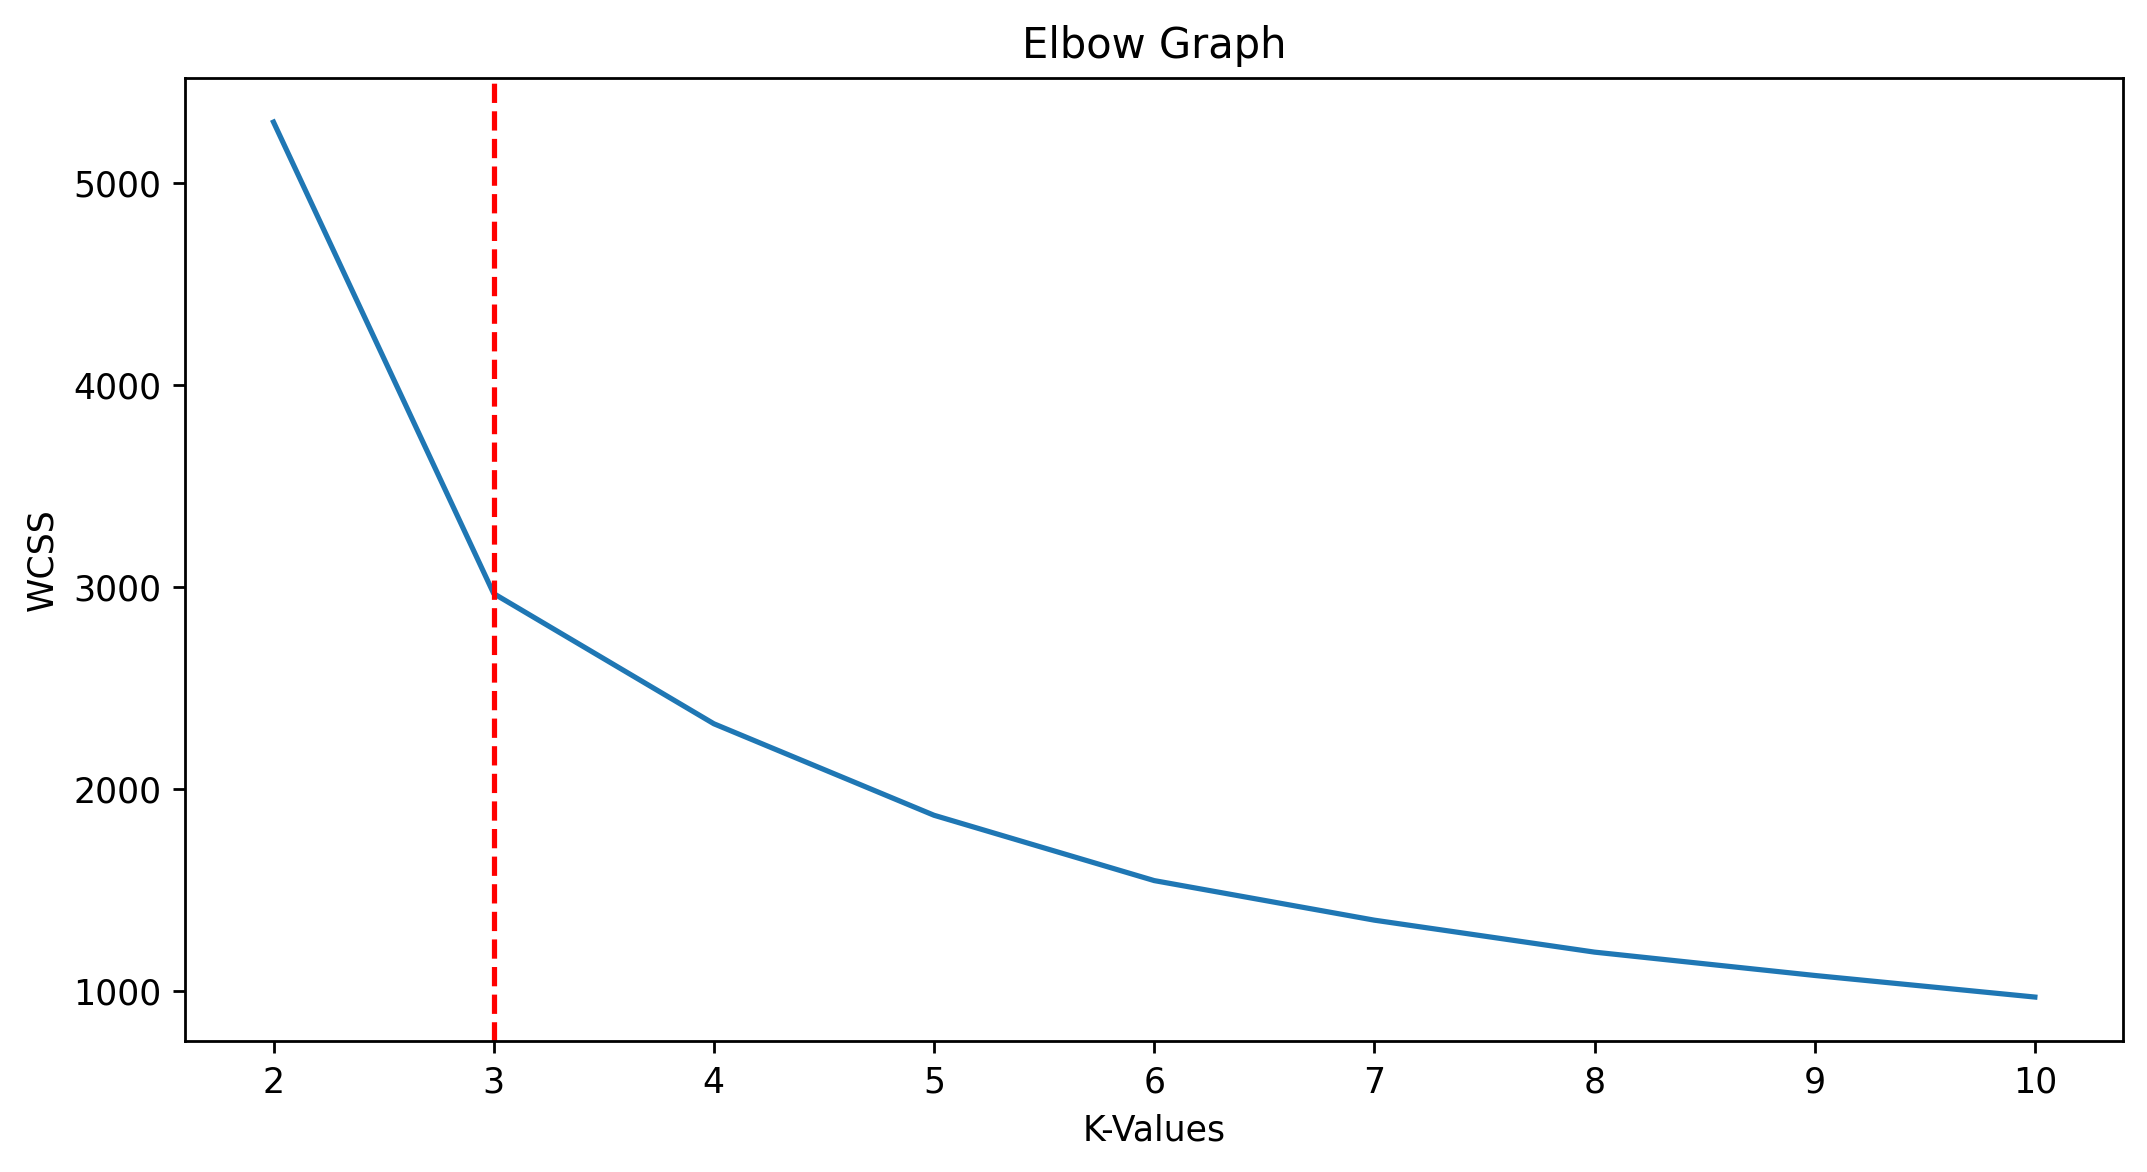

In [ ]:
plt.plot(range(2,11),wcss)
plt.axvline(x = 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [ ]:
# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=3,random_state=42)
yp = kmeans.fit_predict(data)
yp
cluster=pd.DataFrame(yp)
cluster


0
0     1
1     0
2     2
3     0
4     1
...  ..
2211  1
2212  1
2213  2
2214  2
2215  1

[2216 rows x 1 columns]

In [ ]:
cluster.value_counts()

0    1017
2     614
1     585
Name: count, dtype: int64

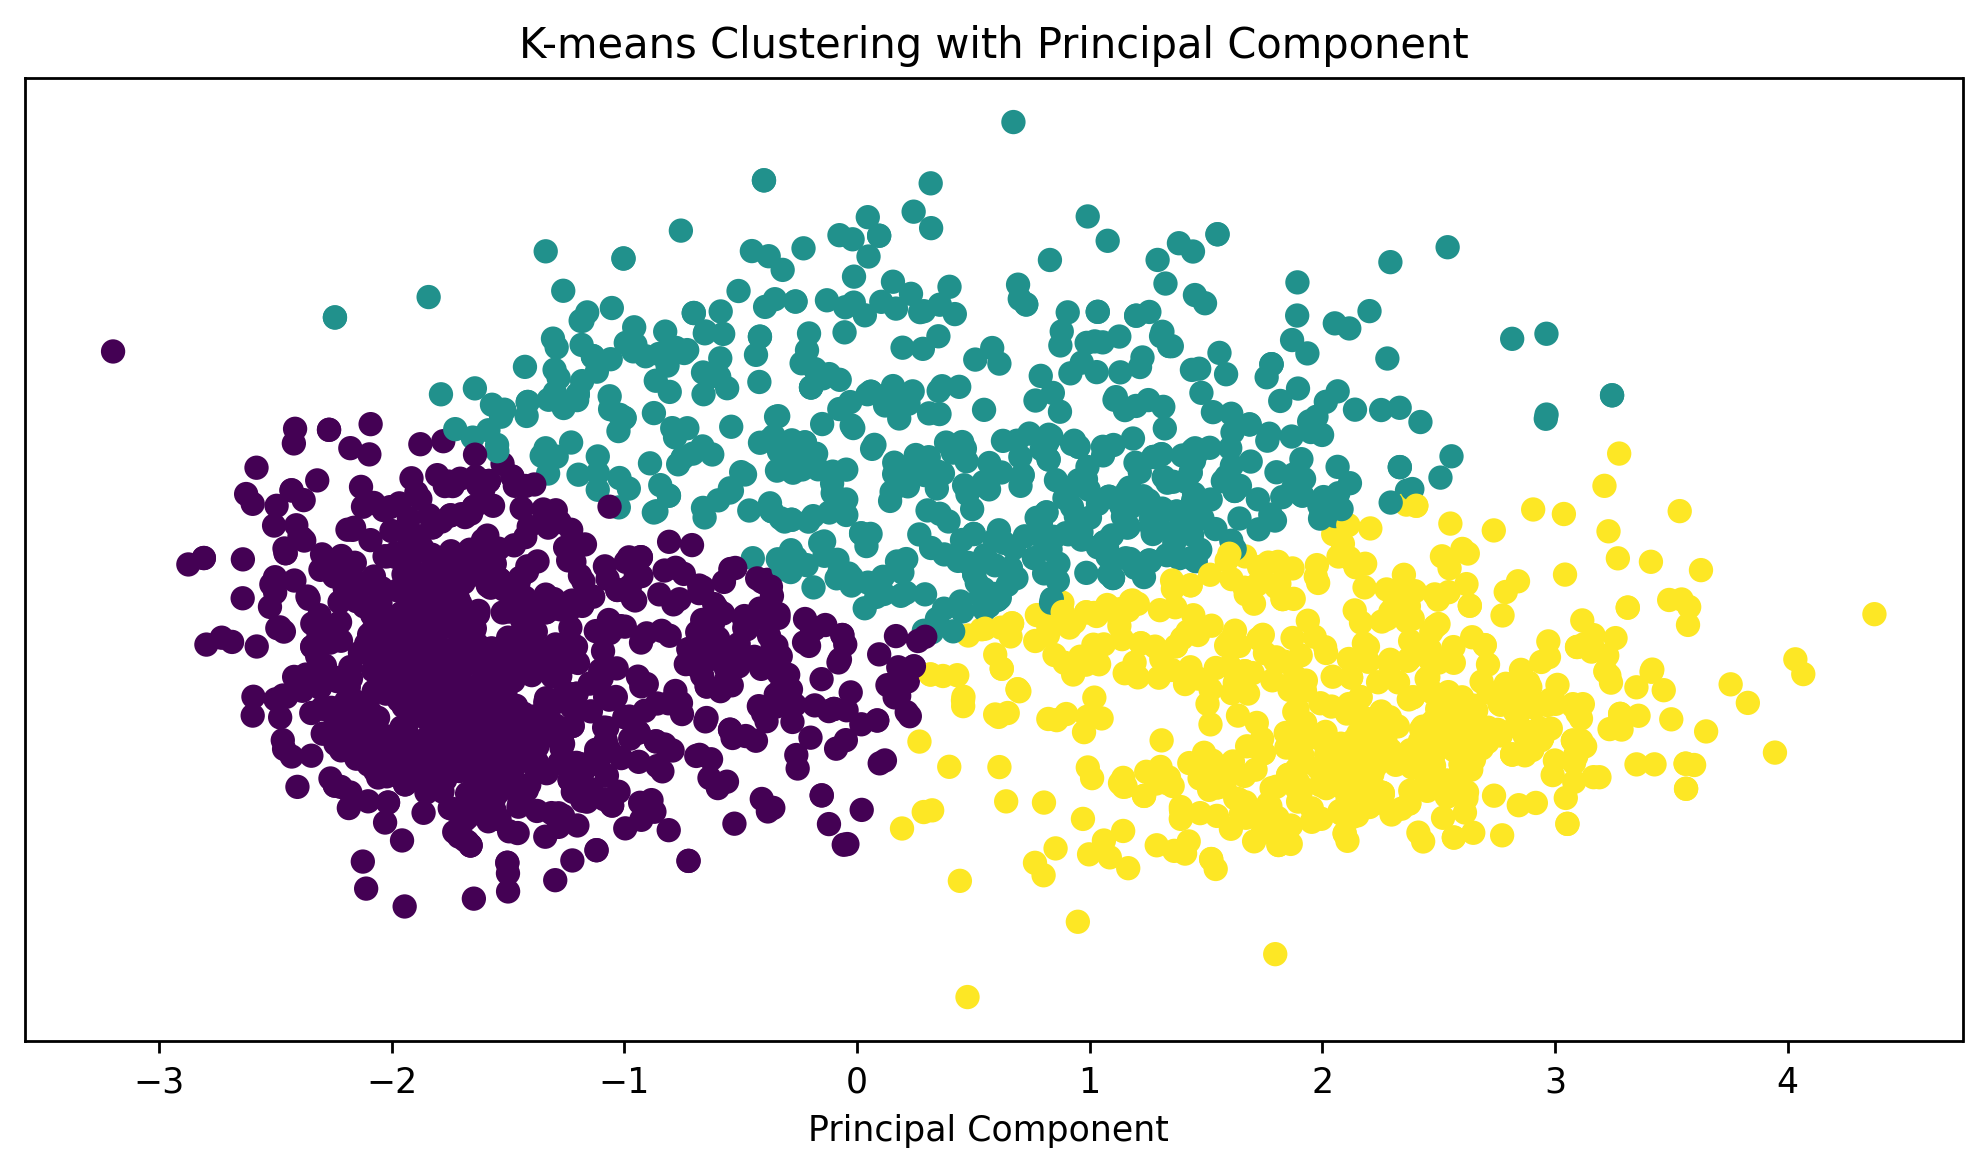

In [ ]:
# Visualize the clusters
plt.scatter(data['PC1'],data['PC2'], c=yp, cmap='viridis')
plt.xlabel('Principal Component ')
plt.title('K-means Clustering with Principal Component')
plt.yticks([])  # Hide y-axis
plt.show()

In [ ]:
silhouette_score(data,yp)

0.49902712967157503

In [ ]:
#DBSCAN
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(data) # predict is predict the cluster label.
y

array([0, 0, 0, ..., 0, 0, 0])

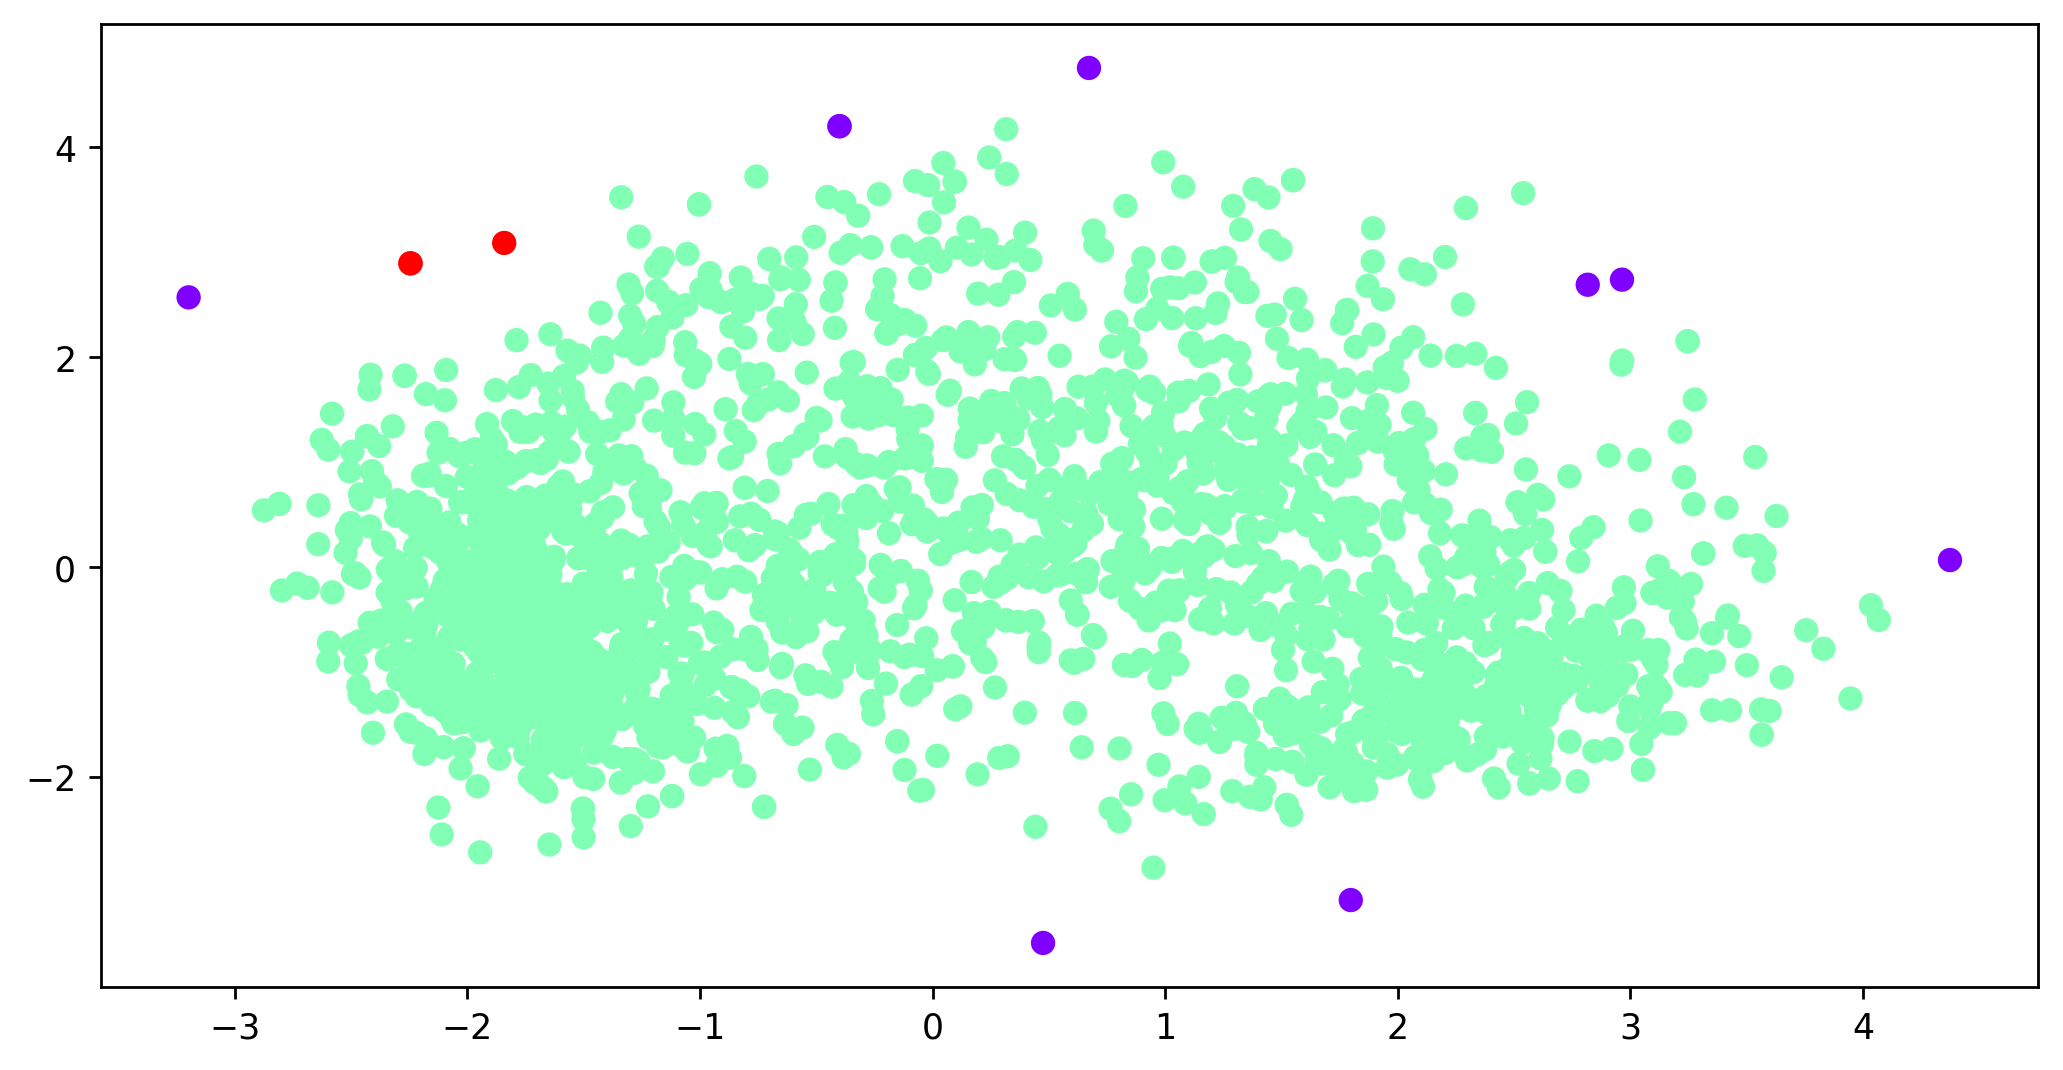

In [ ]:
plt.scatter(data['PC1'], data['PC2'],c = y,cmap = 'rainbow')

In [ ]:
silhouette_score(data,y)

0.2053323045349211

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3).fit(data)
neigh.kneighbors(data)

(array([[0.        , 0.02783001, 0.13266067],
        [0.        , 0.02417732, 0.04555682],
        [0.        , 0.0386131 , 0.03940203],
        ...,
        [0.        , 0.08339739, 0.11682087],
        [0.        , 0.10112717, 0.13126908],
        [0.        , 0.1081631 , 0.13405151]]),
 array([[   0,  884,  492],
        [   1,  870,  309],
        [   2, 1674,   59],
        ...,
        [2213, 1836,  833],
        [2214, 1917, 1797],
        [2215,  183, 1367]]))

In [ ]:
d,index = neigh.kneighbors(data)
d

array([[0.        , 0.02783001, 0.13266067],
       [0.        , 0.02417732, 0.04555682],
       [0.        , 0.0386131 , 0.03940203],
       ...,
       [0.        , 0.08339739, 0.11682087],
       [0.        , 0.10112717, 0.13126908],
       [0.        , 0.1081631 , 0.13405151]])

In [ ]:
d[:,1]

array([0.02783001, 0.02417732, 0.0386131 , ..., 0.08339739, 0.10112717,
       0.1081631 ])

In [ ]:
distance = np.sort(d[:,1])  # to plot k distance plot - sort these value in ascemding order to make the graph interpretable.
distance

array([0.        , 0.        , 0.        , ..., 0.85112822, 0.86000507,
       1.00729983])

Text(0.5, 1.0, 'K-Distance Graph')

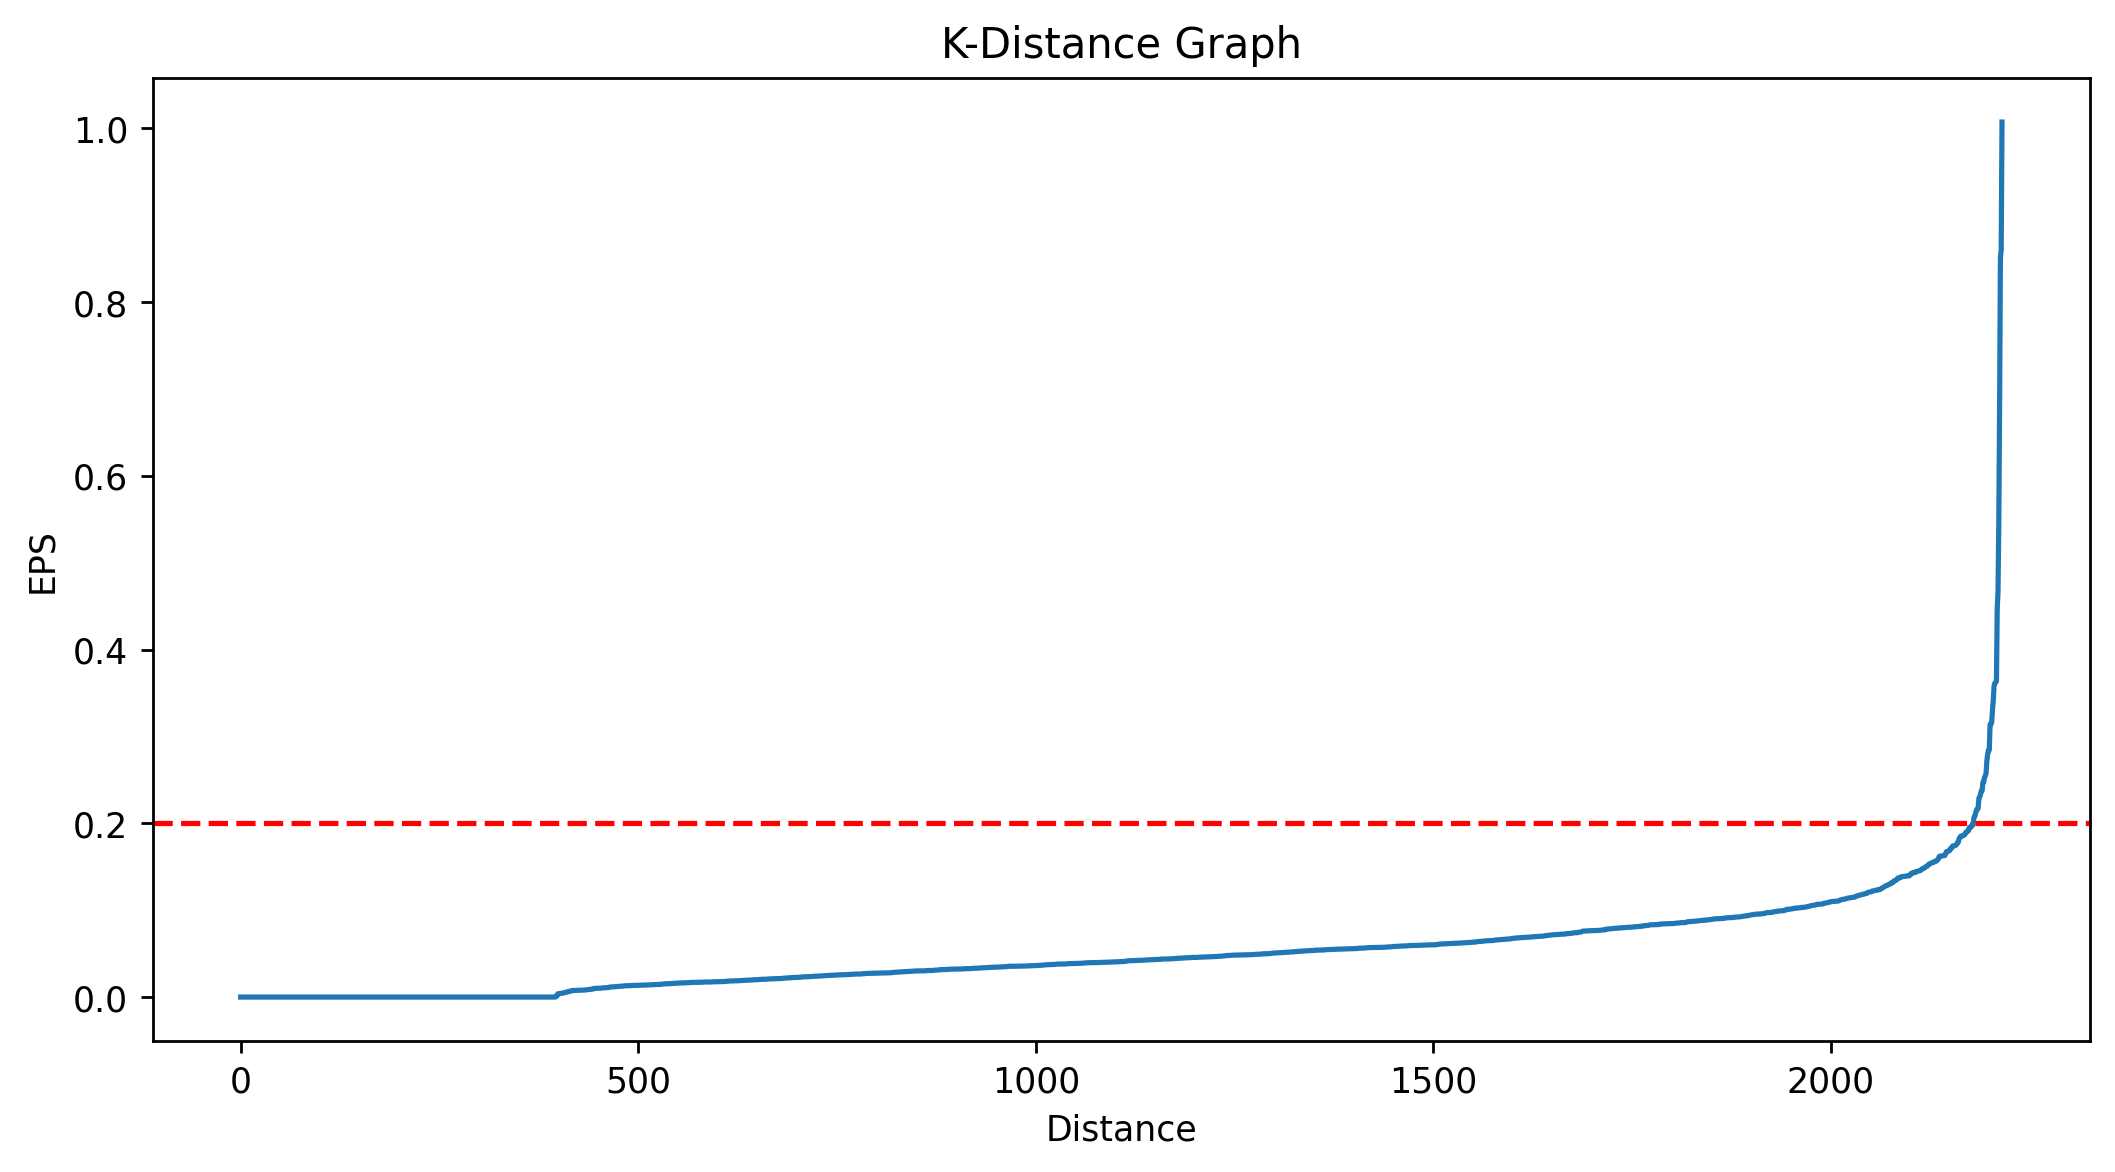

In [ ]:
plt.plot(distance)
plt.axhline(y=0.2, linestyle = '--', color = 'red')
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

In [ ]:
db = DBSCAN(eps=0.2,min_samples=3)
yp = db.fit_predict(data)
yp

array([0, 1, 1, ..., 1, 1, 1])

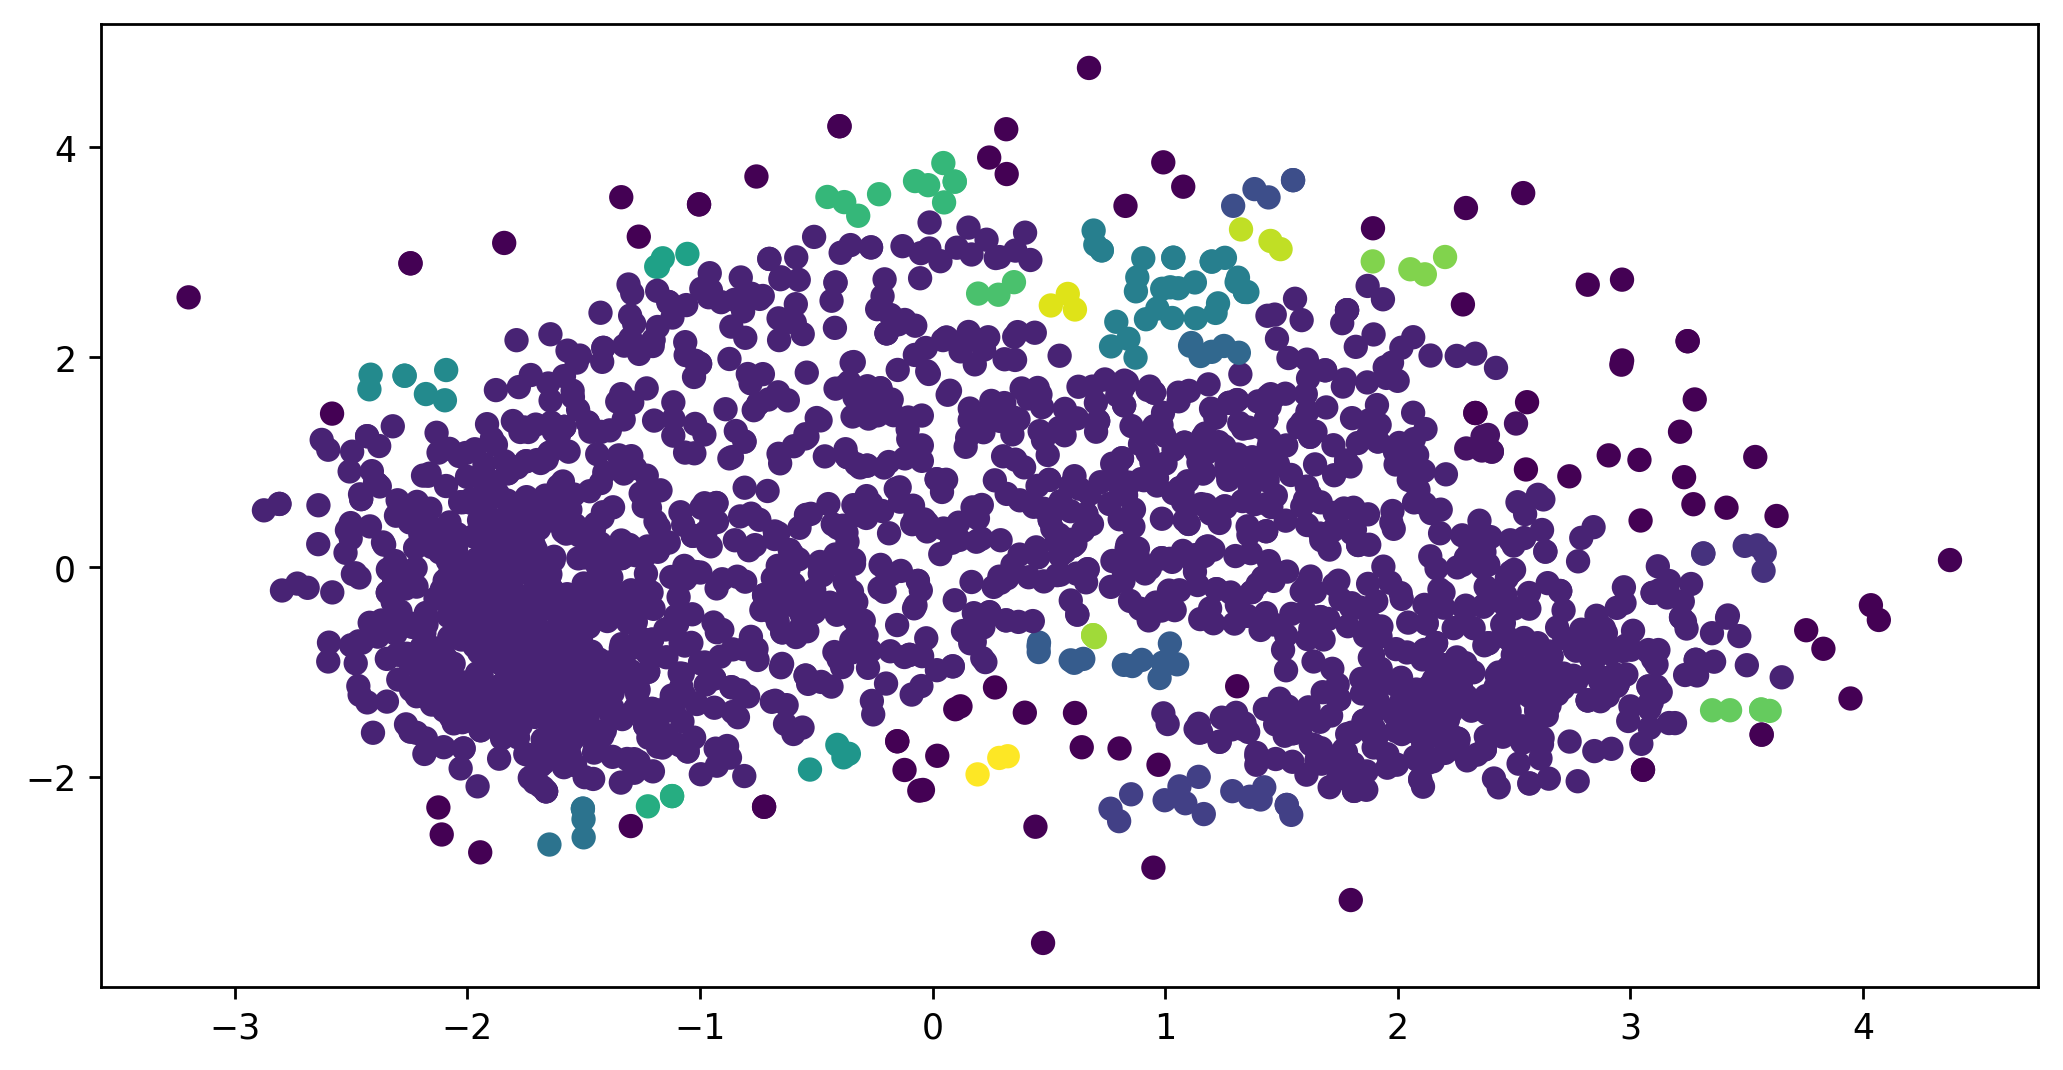

In [ ]:
plt.scatter(data['PC1'],data['PC2'],c = yp, cmap='viridis')

In [ ]:
silhouette_score(data,yp)

-0.4803876211173451

In [ ]:
'''(eps=0.5 and min_samples=3) resulted in a positive Silhouette Score (0.18456685730514025). This suggests that the clusters are somewhat well-defined.
 (eps=0.2 and min_samples=3) resulted in a negative Silhouette Score (-0.4832164437264892). This suggests that the clustering is poor, with samples possibly assigned to incorrect clusters.'''

'(eps=0.5 and min_samples=3) resulted in a positive Silhouette Score (0.18456685730514025). This suggests that the clusters are somewhat well-defined.\n (eps=0.2 and min_samples=3) resulted in a negative Silhouette Score (-0.4832164437264892). This suggests that the clustering is poor, with samples possibly assigned to incorrect clusters.'

In [ ]:
# Comparing cluster models
# Define clustering models
models = {
    'K-Means': KMeans(n_clusters=3, random_state=42),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=4),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=3)
}
results=[]
for name, model in models.items():
    clusters = model.fit_predict(data)
    score = silhouette_score(data, clusters)
    results.append({"MODEL": name, "Score":score})
models_df=pd.DataFrame(results)
models_df.sort_values(by="Score",ascending=False)

MODEL     Score
0                   K-Means  0.499027
1  Agglomerative Clustering  0.413936
2                    DBSCAN  0.205332

In [ ]:
data['Cluster'] = cluster
data

PC1       PC2  Cluster
0     2.364051  1.244703        1
1    -1.719811 -0.253134        0
2     1.798638 -0.382114        2
3    -1.846428 -0.936180        0
4    -0.107037  1.313798        1
...        ...       ...      ...
2211  1.096144  0.818714        1
2212 -0.399966  4.202082        1
2213  1.491909 -1.253087        2
2214  1.517975  0.443596        2
2215 -0.980903  1.264796        1

[2216 rows x 3 columns]

In [ ]:
data.groupby('Cluster').agg('mean')

PC1       PC2
Cluster                    
0       -1.522669 -0.480211
1        0.456761  1.713340
2        2.086888 -0.837018

In [ ]:
'''Cluster 0: Represents customers who are less engaged, have lower income, and lower spending. They might require different strategies to increase their engagement and spending.
Cluster 1: Represents highly engaged and high-spending customers with higher education and income levels. They are responsive to marketing campaigns.
Cluster 2: Represents a distinct group of older customers with high spending but slightly less responsive to marketing campaigns compared to Cluster 1. '''

'Cluster 0: Represents customers who are less engaged, have lower income, and lower spending. They might require different strategies to increase their engagement and spending.\nCluster 1: Represents highly engaged and high-spending customers with higher education and income levels. They are responsive to marketing campaigns.\nCluster 2: Represents a distinct group of older customers with high spending but slightly less responsive to marketing campaigns compared to Cluster 1. '

In [ ]:
#Import library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
x=reduced_df
y=cluster
y

0
0     1
1     0
2     2
3     0
4     1
...  ..
2211  1
2212  1
2213  2
2214  2
2215  1

[2216 rows x 1 columns]

In [ ]:
#Encoding
ordinal_encoder = OrdinalEncoder()
reduced_df[['Marital_Status', 'Education']] = ordinal_encoder.fit_transform(reduced_df[['Marital_Status', 'Education']])

#standardization
sc = StandardScaler()
X= sc.fit_transform(x)
pd.DataFrame(X)

0         1         2         3         4         5         6   \
0     1.008423 -0.819198  0.253130  0.297483 -1.264803  0.310532  1.790000   
1     1.263348 -0.819198  0.253130 -0.262669  1.405806 -0.380509 -0.991090   
2     0.328625 -0.819198  1.194297  0.937474 -1.264803 -0.795134  0.376629   
3    -1.285895 -0.819198  1.194297 -1.198219  0.070501 -0.795134 -0.943612   
4    -1.030971  1.529240 -0.688038  0.304845  0.070501  1.554407 -0.269796   
...        ...       ...       ...       ...       ...       ...       ...   
2211  0.158676 -0.819198 -0.688038  0.444004  0.070501 -0.104093  1.120749   
2212  1.943146  1.529240  1.194297  0.576562  2.741110  0.241428 -0.229623   
2213 -1.030971 -0.819198 -1.629205  0.242532 -1.264803  1.450751  1.225747   
2214  1.093398  0.746428  1.194297  0.825007  0.070501 -1.417072  0.498975   
2215  1.263348  1.529240 -0.688038  0.047234  1.405806 -0.311405 -0.726311   

       7         8         9         10  
0     0.0  0.510352  1.328561  1.617782  
1     0.0 -0.140736 -1.189071 -0.967972  
2     0.0 -0.791824  1.048824  0.755864  
3     0.0 -0.140736 -0.909334 -0.393360  
4     0.0  1.812527  0.209613  0.181252  
...   ...       ...       ...       ...  
2211  0.0 -0.140736  0.489350  1.330476  
2212  0.0  2.463615  0.349482  1.617782  
2213  0.0 -0.791824  0.769087 -0.393360  
2214  0.0 -0.140736  1.188692 -0.106054  
2215  0.0  0.510352 -0.629597  0.181252  

[2216 rows x 11 columns]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
models = {"Logistic Regression": LogisticRegression(),"Decision Tree": DecisionTreeClassifier(),"Random Forest": RandomForestClassifier(),"K-Nearest Neighbors": KNeighborsClassifier(),"Gradient Boosting": GradientBoostingClassifier(),"Support Vector Classifier": SVC(),"Xtreme Gradient Boosting":XGBClassifier(),"naive classifier": GaussianNB()}
results = []
for name, model in models.items():
    model.fit(xtrain, ytrain)
    yp = model.predict(xtest)
    Train_Accuracy = model.score(xtrain, ytrain)
    Test_Accuracy = model.score(xtest, ytest)
    results.append({"MODEL": name, "Train Acc": Train_Accuracy, "Test Acc":Test_Accuracy})
models_df = pd.DataFrame(results)
models_df.sort_values(by=["Train Acc","Test Acc"], ascending=False)

MODEL  Train Acc  Test Acc
4          Gradient Boosting   1.000000  0.968468
6   Xtreme Gradient Boosting   1.000000  0.968468
2              Random Forest   1.000000  0.963964
1              Decision Tree   1.000000  0.918919
0        Logistic Regression   0.997178  0.993243
5  Support Vector Classifier   0.990971  0.986486
3        K-Nearest Neighbors   0.962190  0.950450
7           naive classifier   0.948081  0.950450

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Xtreme Gradient Boosting": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

# ANN Model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = create_ann_model(xtrain.shape[1])
models['ANN'] = ann_model

results = []

for name, model in models.items():
    if name == 'ANN':
        model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        yp = (model.predict(xtest) > 0.5).astype("int32")
    else:
        model.fit(xtrain, ytrain)
        yp = model.predict(xtest)

    # Calculate metrics
    Train_Accuracy = model.score(xtrain, ytrain) if name != 'ANN' else model.evaluate(xtrain, ytrain, verbose=0)[1]
    Test_Accuracy = model.score(xtest, ytest) if name != 'ANN' else model.evaluate(xtest, ytest, verbose=0)[1]
    mse = mean_squared_error(ytest, yp)
    rmse = mean_squared_error(ytest, yp, squared=False)
    mae = mean_absolute_error(ytest, yp)
    r2 = r2_score(ytest, yp)

    results.append({
        "MODEL": name,
        "Train Acc": Train_Accuracy,
        "Test Acc": Test_Accuracy,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2
    })
models_df = pd.DataFrame(results)
models_df.sort_values(by=["Test Acc", "Train Acc", "RMSE", "R-squared"], ascending=False, inplace=True)
models_df

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


MODEL  Train Acc  Test Acc       MSE      RMSE  \
0        Logistic Regression   0.997178  0.993243  0.013514  0.116248   
5  Support Vector Classifier   0.990971  0.986486  0.033784  0.183804   
4          Gradient Boosting   1.000000  0.968468  0.051802  0.227600   
6   Xtreme Gradient Boosting   1.000000  0.968468  0.051802  0.227600   
2              Random Forest   1.000000  0.959459  0.067568  0.259938   
3        K-Nearest Neighbors   0.962190  0.950450  0.076577  0.276725   
7                Naive Bayes   0.948081  0.950450  0.063063  0.251124   
1              Decision Tree   1.000000  0.918919  0.101351  0.318357   
8                        ANN   0.650113  0.648649  0.351351  0.592749   

        MAE  R-squared  
0  0.009009   0.981346  
5  0.020270   0.953365  
4  0.038288   0.928493  
6  0.038288   0.928493  
2  0.049550   0.906730  
3  0.058559   0.894294  
7  0.054054   0.912948  
1  0.087838   0.860095  
8  0.351351   0.514995

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Xtreme Gradient Boosting": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

# ANN Model
def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = create_ann_model(xtrain.shape[1])
models['ANN'] = ann_model

# LSTM Model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for LSTM
xtrain_lstm = xtrain.reshape((xtrain.shape[0], 1, xtrain.shape[1]))
xtest_lstm = xtest.reshape((xtest.shape[0], 1, xtest.shape[1]))
lstm_model = create_lstm_model((xtrain_lstm.shape[1], xtrain_lstm.shape[2]))
models['LSTM'] = lstm_model

results = []
for name, model in models.items():
    if name == 'ANN':
        model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        yp = (model.predict(xtest) > 0.5).astype("int32")
    elif name == 'LSTM':
        model.fit(xtrain_lstm, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        yp = (model.predict(xtest_lstm) > 0.5).astype("int32")
    else:
        model.fit(xtrain, ytrain)
        yp = model.predict(xtest)

    # Calculate metrics
    Train_Accuracy = model.score(xtrain, ytrain) if name not in ['ANN', 'LSTM'] else model.evaluate(xtrain_lstm if name == 'LSTM' else xtrain, ytrain, verbose=0)[1]
    Test_Accuracy = model.score(xtest, ytest) if name not in ['ANN', 'LSTM'] else model.evaluate(xtest_lstm if name == 'LSTM' else xtest, ytest, verbose=0)[1]
    mse = mean_squared_error(ytest, yp)
    rmse = mean_squared_error(ytest, yp, squared=False)
    mae = mean_absolute_error(ytest, yp)
    r2 = r2_score(ytest, yp)

    results.append({
        "MODEL": name,
        "Train Acc": Train_Accuracy,
        "Test Acc": Test_Accuracy,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2
    })
models_df = pd.DataFrame(results)
models_df.sort_values(by=["Test Acc", "Train Acc", "RMSE", "R-squared"], ascending=False, inplace=True)
models_df



14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


MODEL  Train Acc  Test Acc       MSE      RMSE  \
0        Logistic Regression   0.997178  0.993243  0.013514  0.116248   
5  Support Vector Classifier   0.990971  0.986486  0.033784  0.183804   
4          Gradient Boosting   1.000000  0.968468  0.051802  0.227600   
6   Xtreme Gradient Boosting   1.000000  0.968468  0.051802  0.227600   
2              Random Forest   1.000000  0.959459  0.067568  0.259938   
3        K-Nearest Neighbors   0.962190  0.950450  0.076577  0.276725   
7                Naive Bayes   0.948081  0.950450  0.063063  0.251124   
1              Decision Tree   1.000000  0.921171  0.099099  0.314800   
9                       LSTM   0.721219  0.702703  0.297297  0.545250   
8                        ANN   0.656321  0.650901  0.349099  0.590846   

        MAE  R-squared  
0  0.009009   0.981346  
5  0.020270   0.953365  
4  0.038288   0.928493  
6  0.038288   0.928493  
2  0.049550   0.906730  
3  0.058559   0.894294  
7  0.054054   0.912948  
1  0.085586   0.863204  
9  0.297297   0.589611  
8  0.349099   0.518104

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam

In [ ]:
# Additional models
def create_dnn_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
dnn_model = create_dnn_model(xtrain.shape[1])
models['DNN'] = dnn_model

additional_models = {
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# Integrate additional models into the existing models dictionary
models.update(additional_models)

In [ ]:
# Fit and evaluate models
results = []
for name, model in models.items():
    if name == 'ANN':
        model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        yp = (model.predict(xtest) > 0.5).astype("int32")
    elif name == 'LSTM':
        model.fit(xtrain_lstm, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        yp = (model.predict(xtest_lstm) > 0.5).astype("int32")
    elif name == 'DNN':
        model.fit(xtrain, ytrain, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        yp = (model.predict(xtest) > 0.5).astype("int32")
    else:
        model.fit(xtrain, ytrain)
        yp = model.predict(xtest)

    # Calculate metrics
    Train_Accuracy = model.score(xtrain, ytrain) if name not in ['ANN', 'LSTM', 'DNN'] else model.evaluate(xtrain_lstm if name == 'LSTM' else xtrain, ytrain, verbose=0)[1]
    Test_Accuracy = model.score(xtest, ytest) if name not in ['ANN', 'LSTM', 'DNN'] else model.evaluate(xtest_lstm if name == 'LSTM' else xtest, ytest, verbose=0)[1]
    mse = mean_squared_error(ytest, yp)
    rmse = mean_squared_error(ytest, yp, squared=False)
    mae = mean_absolute_error(ytest, yp)
    r2 = r2_score(ytest, yp)

    results.append({
        "MODEL": name,
        "Train Acc": Train_Accuracy,
        "Test Acc": Test_Accuracy,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2
    })

models_df = pd.DataFrame(results)
models_df.sort_values(by=["Test Acc", "Train Acc", "RMSE", "R-squared"], ascending=False, inplace=True)
models_df

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 745
[LightGBM] [Info] Number of data points in the train set: 1772, number of used features: 10
[LightGBM] [Info] Start training from score -0.781596
[LightGBM] [Info] Start training from score -1.314446
[LightGBM] [Info] Start training from score -1.295715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


MODEL  Train Acc  Test Acc       MSE      RMSE  \
0         Logistic Regression   0.997178  0.993243  0.013514  0.116248   
5   Support Vector Classifier   0.990971  0.986486  0.033784  0.183804   
14                   CatBoost   1.000000  0.972973  0.047297  0.217479   
12                Extra Trees   1.000000  0.970721  0.049550  0.222597   
4           Gradient Boosting   1.000000  0.968468  0.051802  0.227600   
6    Xtreme Gradient Boosting   1.000000  0.968468  0.051802  0.227600   
13                   LightGBM   1.000000  0.963964  0.056306  0.237289   
2               Random Forest   1.000000  0.959459  0.067568  0.259938   
3         K-Nearest Neighbors   0.962190  0.950450  0.076577  0.276725   
7                 Naive Bayes   0.948081  0.950450  0.063063  0.251124   
11                   AdaBoost   0.956546  0.921171  0.105856  0.325355   
1               Decision Tree   1.000000  0.909910  0.117117  0.342224   
9                        LSTM   0.722912  0.704955  0.295045  0.543180   
8                         ANN   0.650677  0.650901  0.349099  0.590846   
10                        DNN   0.642212  0.650901  0.349099  0.590846   

         MAE  R-squared  
0   0.009009   0.981346  
5   0.020270   0.953365  
14  0.033784   0.934711  
12  0.036036   0.931602  
4   0.038288   0.928493  
6   0.038288   0.928493  
13  0.042793   0.922275  
2   0.049550   0.906730  
3   0.058559   0.894294  
7   0.054054   0.912948  
11  0.087838   0.853877  
1   0.099099   0.838332  
9   0.295045   0.592720  
8   0.349099   0.518104  
10  0.349099   0.518104

In [ ]:
#pipeline
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn import set_config
set_config(display='diagram')

In [ ]:
x

Age  Education  Marital_Status   Income  Total_Children  Recency  \
0     67.0        1.0             2.0  58138.0             0.0     58.0   
1     70.0        1.0             2.0  46344.0             2.0     38.0   
2     59.0        1.0             3.0  71613.0             0.0     26.0   
3     40.0        1.0             3.0  26646.0             1.0     26.0   
4     43.0        4.0             1.0  58293.0             1.0     94.0   
...    ...        ...             ...      ...             ...      ...   
2235  57.0        1.0             1.0  61223.0             1.0     46.0   
2236  78.0        4.0             3.0  64014.0             3.0     56.0   
2237  43.0        1.0             0.0  56981.0             0.0     91.0   
2238  68.0        3.0             3.0  69245.0             1.0      8.0   
2239  70.0        4.0             1.0  52869.0             2.0     40.0   

      Total_Spending  Total_Accepted_Campaigns  NumDealsPurchases  \
0             1550.0                       0.0                3.0   
1               27.0                       0.0                2.0   
2              776.0                       0.0                1.0   
3               53.0                       0.0                2.0   
4              422.0                       0.0                5.0   
...              ...                       ...                ...   
2235          1183.5                       0.0                2.0   
2236           444.0                       0.0                6.0   
2237          1241.0                       0.0                1.0   
2238           843.0                       0.0                2.0   
2239           172.0                       0.0                3.0   

      Total_Purchases  Web_Interaction  
0                22.0             15.0  
1                 4.0              6.0  
2                20.0             12.0  
3                 6.0              8.0  
4                14.0             10.0  
...               ...              ...  
2235             16.0             14.0  
2236             15.0             15.0  
2237             18.0              8.0  
2238             21.0              9.0  
2239              8.0             10.0  

[2216 rows x 11 columns]

In [ ]:
y

0
0     1
1     0
2     2
3     0
4     1
...  ..
2211  1
2212  1
2213  2
2214  2
2215  1

[2216 rows x 1 columns]

In [ ]:
transformer= ColumnTransformer(transformers=[
    ('tnf1', StandardScaler(), [0, 3, 4, 5, 6, 7, 8, 9, 10])], remainder='passthrough')

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

model3= Pipeline(steps=[('transformer', transformer),('model3',SVC())])

In [ ]:
model3.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', StandardScaler(),
                                                  [0, 3, 4, 5, 6, 7, 8, 9,
                                                   10])])),
                ('model3', SVC())])

In [ ]:
ypred = model3.predict(xtest)
ypred

array([1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 2, 1,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 2,

In [ ]:
pickle.dump(model3, open('model3.pkl','wb'))
print("Model saved successfully")

Model saved successfully
